# Название проекта: <br>Выявление закономерностей, определяющих успешность игры,  на основе данных из открытых источников о продажах игр.

# Описание проекта.

Выявить определяющие успешность игры закономерности на основе данных из открытых источников о продажах игр, оценки пользователей и экспертов, жанрах и платформах - для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 

*Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.*

# Цель проекта.

Подготовить данные для выявления потенциально популярного продукта и планирования рекламных кампаний.



# План работ.

**1. Открыть файл с данными и изучить общую информацию**

**2. Подготовить данные**

* Заменить названия столбцов (привести к нижнему регистру);
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
* Обработать пропуски при необходимости;
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
* Описать причины, которые могли привести к пропускам;
* Разобрать аббревиатуру 'tbd' в столбце с оценкой пользователей и описать, как его обработать;
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**3. Провести исследовательский анализ данных**

* Посмотреть, сколько игр выпускалось в разные годы. Объяснить, важны ли данные за все периоды;
* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Посмотреть, за какой характерный срок появляются новые и исчезают старые платформы;
* Возять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы.
* Посмотреть, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
* Соотнести выводы с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам. Определить самые прибыльные жанры. Определить, выделяются ли жанры с высокими и низкими продажами.

**4. Составить портрет пользователя каждого региона**

* Определить портрет пользователя для каждого региона (NA, EU, JP);
* Определить самые популярные платформы (топ-5). Описать различия в долях продаж;
* Пояснить разницу в топ-5 самых популярных жанров;
* Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

**5. Проверка гипотез**

* Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задать самостоятельно пороговое значение alpha.

Пояснить:
* Как сформулированы нулевая и альтернативная гипотезы;
* Какой критерий был применён для проверки гипотез и почему.

**6. Общий вывод**

# Выполнение проекта.

## Изучение общей информации файла данных

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Автоматизируем рутинные операции (функция написана заранее, чтобы на проектах не тратить время на механическую работу):

In [2]:
def columns_name_std(columns_names):
    """
    Функция получает список имен всех столбцов и приводит их к нормальному виду
    путем замены "ненужных" символов из списка chars_to_replace на '_'
    и вставки символа '_' перед заглавными буквами или числами из списка markers
    с последующим изменением всех букв на строчные.
    Любой из этих двух списков может быть дополнен или сокращен.
    """
    
    markers = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    chars_to_replace = '*-.,'

    # создадим пустой словарь для переименования
    new_names_dict = {}
    
    # разложим список названий на отдельные названия
    for name in columns_names :
        
        # создадим переменную для карты для внесения изменений 
        # и копию имени, которую и будем редактировать, оставив при этом оригинал
        marker_maps = []
        new_name = name
        
        # заменим все символы "_" на пробелы, чтобы избежать задвоений, затроений и т.п.
        new_name = new_name.replace('_', ' ')
              
        # проверим копию названия на наличе в ней символов для замены и заменим их, если они есть
        for ch in chars_to_replace :
            new_name = new_name.replace(ch, ' ')
        
        # заполним карту индексами маркеров, если они есть
        for i,ch in enumerate(new_name) :
            if ch in markers :
                marker_maps.append(i)
        
        # если карта непустая
        if marker_maps != [] :
            
            # проверим наличие серийных маркеров, чтобы избежать разделения числа на цифры или имени на буквы и т.п.
            # для упрощения алгоритма сделаем это от хвоста к началу
            for i in marker_maps[::-1] :
                
                # если предыдущее значение тоже маркер, значит, это серия и текущее значение удаляем из карты
                # так мы оставим только первый элемент серии
                if (i-1) in marker_maps :
                    marker_maps.remove(i)
                    
            # добавим разделитель перед каждым оставшимся маркером
            # добавление производим тоже в обратном порядке, чтобы не смещать еще необработанные индексы
            for i in marker_maps[::-1] :
                new_name = new_name[:i] + ' ' + new_name[i:]
        
        # теперь разложим строку нового названия на элементы, 
        # соберем элементы в строку с символом '_' в качестве разделителя
        # и уберем все заглавные буквы, они больше не нужны.
        # соберем старые и новые значения в словарь
        new_names_dict[name] = str.lower('_'.join(new_name.split()))
    
    return new_names_dict

In [3]:
# Используем блок try ... except для чтения файла данных из различных источников.
# Первый вариант для локальной работы, второй - для работы в Практикуме.

try :
    data = pd.read_csv('games.csv')
except :
    data = pd.read_csv('/datasets/games.csv')

Установим с некоторым запасом количество отображаемых столбцов, чтобы были видны все заголовки.

In [4]:
pd.options.display.max_columns = data.shape[1]+5
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Посмотрим на пропуски:

In [5]:
# не усложняем названия переменных h1 и h1_format - они используются только в этом блоке
# заменим стандартные названия на более человеческие
h1 = {'count' : 'total', 
      'sum' : 'na', 
      'mean' : 'na_share'}

# применим удобный формат вывода
h1_format = {'total' : '{:.0f}', 
             'na' : '{:.0f}', 
             'na_share' : '{:.1%}'}

# найдем пропуски и посчитаем их долю
# значения отсортируем по убыванию
data.isna() \
    .agg(['count','sum','mean']) \
    .transpose() \
    .rename(columns=h1) \
    .sort_values('na', ascending=False) \
    .style \
    .format(h1_format)

Ретинги критиков, ESRB и Пользовательский имеют значитльную часть пропусков. Первые два восстановить невозможно (в обоих случаях неизвестен алгоритм присвоения рейтинга).Что касается третьего, ползовательского рейтинга, решение на данном этапе принять не можем, будем смотреть корреляцию с первыми 2мя  и после этого сможем принять решение.

Год релиза: важный для нас показатель, по нему будеть происходить значимая часть анализа. Отсутствуют 1.6% данных - можем спокойно удалить, остается значительно больше 95% исходных данных.

По 2 пропуска в Названии игры и Жанре тоже можно удалить.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбцы ESRB и Пользовательский рейтинги и Год выхода имеют неподходящий для исследования формат, необходимо преобразование.

### Вывод: общая информация

Изучив общую информацию о датасете мы видим, что в нем содержится 11 столбцов данных, все названия столбцов имеют в своем составе прописные буквы, три метрики - Ретинги критиков, ESRB и Пользовательский -  имеют значительные пропуски.

Первые два восстановить невозможно (в обоих случаях неизвестен алгоритм присвоения рейтинга). Что касается третьего, ползовательского рейтинга, решение на данном этапе принять не можем, будем смотреть корреляцию с первым  и после этого сможем принять решение.

Год релиза: важный для нас показатель, по нему будеть происходить значимая часть анализа. Отсутствуют 1.6% данных - можем спокойно удалить, остается значительно больше 95% исходных данных.

По 2 пропуска в Названии игры и Жанре тоже можно удалить.

Столбцы Пользовательский рейтинг и Год выхода имеют неподходящий для исследования формат, необходимо преобразование.

## Подготовка данных

Сохраним информацию об общем количестве строк - в дальнейшем определим, сколько данных осталось после удалений.

Для этого создадим константу и инициализируем ее:

In [7]:
INITIAL_DATA_LEN = data.shape[0]
INITIAL_DATA_LEN

16715

Используем ранее написанную функцию, которая приводит названия столбцов к нормальному виду.

Применим её и проверим результат её работы:

In [8]:
data = data.rename(columns=columns_name_std(data.columns))
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Ок, названия столбцов приведены к нормальному виду. 

Удаляем данные с пропусками в столбцах:
* `'year_of_release'`
* `'name'`
* `'genre'`

In [9]:
len_tmp = len(data) # сохраним количество строк до преобразования - потом проверим результат
data = data.dropna(subset=['name','genre'])
print('После преобразования удалено строк:', len_tmp - len(data))
print('Осталось строк:', len(data))
print('Осталось данных:', round(len(data)/INITIAL_DATA_LEN*100,2),'%', '\n' )

После преобразования удалено строк: 2
Осталось строк: 16713
Осталось данных: 99.99 % 



Удалено только 2 строки - то есть, в обеих строках отсутствовали и Название и Жанр. Это еще одно подтверждение корректности их удаления.

Для столбца Дата выхода построим гистограммы до и после, чтобы визуально оценить отсутствие влияния удалений на данные.

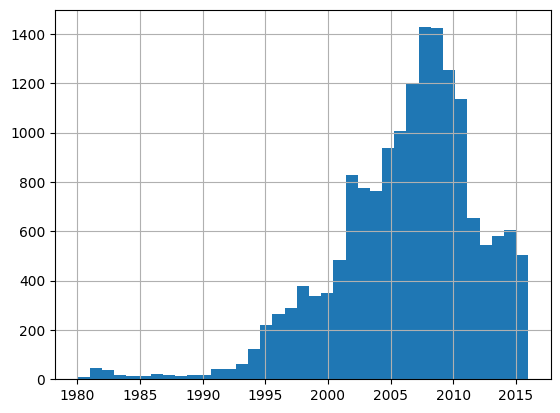

In [10]:
data['year_of_release'].hist(bins=37);

После преобразования удалено строк: 269
Осталось строк: 16444
Осталось данных: 98.38 % 



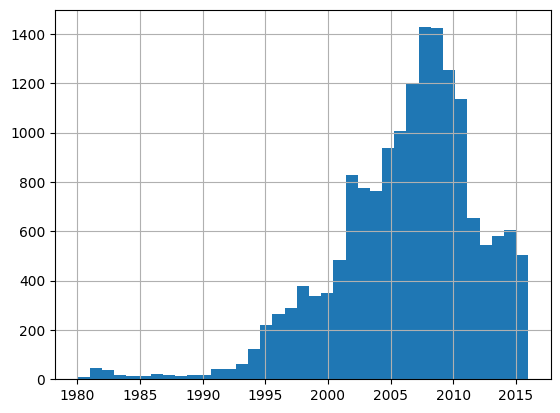

In [11]:
len_tmp = len(data) # сохраним количество строк до преобразования - потом проверим результат
data = data.dropna(subset=['year_of_release'])
print('После преобразования удалено строк:', len_tmp - len(data))
print('Осталось строк:', len(data))
print('Осталось данных:', round(len(data)/INITIAL_DATA_LEN*100,2),'%', '\n' )
data['year_of_release'].hist(bins=37);

Общая картина не исказилась, удаление корректно.

Теперь можно преобразовать столбец в `int`:

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].dtype

dtype('int32')

Посмотрим столбец `'rating'`

In [13]:
print(data['rating'].value_counts().sort_values(ascending=False).head(20))
data['rating'].unique()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В списке значений присутствуют 4 категории рейтингов с единичными записями. EC и K-A можно заменить на E, AO на M, RP на nan (значит, что рейтинг пока не присвоен). 

**nan** оставляем, как есть, заменить не можем.

In [14]:
# заменим старые обозначения рейтингов на актуальные:
ratings_to_rename = ['EC','K-A']
data.loc[data['rating'].isin(ratings_to_rename), 'rating' ] = 'E'

ratings_to_rename = ['AO']
data.loc[data['rating'].isin(ratings_to_rename), 'rating' ] = 'M'

ratings_to_rename = ['RP']
data.loc[data['rating'].isin(ratings_to_rename), 'rating' ] = np.nan

# посмотрим на результат:
data['rating'].value_counts().sort_values(ascending=False).head(20)

E       3932
T       2905
M       1537
E10+    1393
Name: rating, dtype: int64

Замена прошло корректно. Перейдем к анализу столбца `'user_score'`:

In [15]:
data['user_score'].value_counts().sort_values(ascending=False).head()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

В топе нецифровой рейтинг `tbd`. 

to be determined - можно предположить, что было собрано слишком мало оценок пользователей для выставления цифрового рейтинга.

Посмотрим на остальную информацию для строк с `tbd`

In [16]:
data[data['user_score'] == 'tbd'].head()

name platform  year_of_release   genre  \
119                   Zumba Fitness      Wii             2010  Sports   
301  Namco Museum: 50th Anniversary      PS2             2005    Misc   
520                 Zumba Fitness 2      Wii             2011  Sports   
645                    uDraw Studio      Wii             2010    Misc   
718                 Just Dance Kids      Wii             2010    Misc   

     na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
119      3.45      2.59       0.0         0.66           NaN        tbd      E  
301      2.08      1.35       0.0         0.54          61.0        tbd   E10+  
520      1.51      1.03       0.0         0.27           NaN        tbd      T  
645      1.65      0.57       0.0         0.20          71.0        tbd      E  
718      1.52      0.54       0.0         0.18           NaN        tbd      E

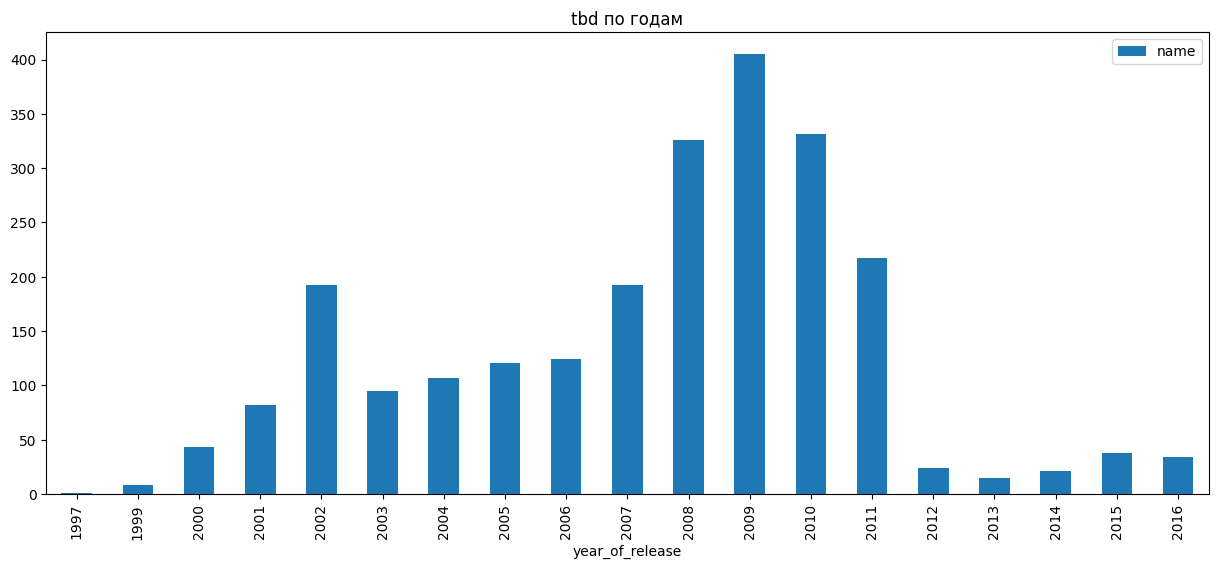

In [17]:
data[data['user_score'] == 'tbd'].pivot_table(index='year_of_release', values='name', aggfunc='count') \
                                .plot(y='name', kind='bar', figsize = (15,6), title='tbd по годам');

Анализ по годам не дает линейной зависимости.

Т.к. данных с `tbd` значимое количество, удалить их мы не можем. Имеет смысл заменить на `nan`, тем более что логически такое преобразование обосновано, данных действительно нет.

In [18]:
data.loc[ data['user_score'] == 'tbd', ['user_score']] = np.nan

Теперь можно преобразовать во `float`:

In [19]:
data['user_score'] = data['user_score'].astype('float')
data['user_score'].dtype

dtype('float64')

Заменили отсутствующие данные, обозначенные как `tbd` на `nan` и преобразовали в формат `float64`.

Добавим продажи по всем регионам в отдельный столбец:

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

Проверим наличие дубликатов:

In [21]:
data.duplicated().sum()

0

Явных дубликатов нет. Проверим на неявные.

Проверку делаем по двум столбцам предварительно приведя название к нижнему регистру (убираем проблему строчных/прописных букв).

In [22]:
data['lower_name'] = data['name'].str.lower()
data.duplicated(['lower_name','platform']).sum()

3

Находим 3 неявных дубликата. Рассмотрим каждый из них:

In [23]:
data[data.duplicated(['lower_name','platform'])]

name platform  year_of_release   genre  \
1591   Need for Speed: Most Wanted     X360             2005  Racing   
11715  Need for Speed: Most Wanted       PC             2012  Racing   
16230                Madden NFL 13      PS3             2012  Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1591        1.0      0.13      0.02         0.10          83.0         8.5   
11715       0.0      0.06      0.00         0.02          82.0         8.5   
16230       0.0      0.01      0.00         0.00          83.0         5.5   

      rating  total_sales                   lower_name  
1591       T         1.25  need for speed: most wanted  
11715      T         0.08  need for speed: most wanted  
16230      E         0.01                madden nfl 13

In [24]:
dup_row = 1591
name = data.loc[dup_row,'lower_name']
platform = data.loc[dup_row,'platform']
data.query('name.str.lower() == @name and platform == @platform ')

name platform  year_of_release   genre  na_sales  \
1190  Need for Speed: Most Wanted     X360             2012  Racing      0.62   
1591  Need for Speed: Most Wanted     X360             2005  Racing      1.00   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
1190      0.78      0.01         0.15          83.0         8.5      T   
1591      0.13      0.02         0.10          83.0         8.5      T   

      total_sales                   lower_name  
1190         1.56  need for speed: most wanted  
1591         1.25  need for speed: most wanted

In [25]:
dup_row = 11715
name = data.loc[dup_row,'lower_name']
platform = data.loc[dup_row,'platform']
data.query('name.str.lower() == @name and platform == @platform ')

name platform  year_of_release   genre  \
5972   Need for Speed: Most Wanted       PC             2005  Racing   
11715  Need for Speed: Most Wanted       PC             2012  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
5972       0.02      0.23       0.0         0.04          82.0         8.5   
11715      0.00      0.06       0.0         0.02          82.0         8.5   

      rating  total_sales                   lower_name  
5972       T         0.29  need for speed: most wanted  
11715      T         0.08  need for speed: most wanted

Согласно [википедии](https://ru.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted), релиз `'Need for Speed: Most Wanted'` состоялся в 2005 году, а в 2012 вышел одноименный ремейк. То есть эти записи дубликатами не являются - оставляем.

In [26]:
dup_row = 16230
name = data.loc[dup_row,'lower_name']
platform = data.loc[dup_row,'platform']
data.query('name.str.lower() == @name and platform == @platform ')

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  total_sales  \
604         0.0         0.23          83.0         5.5      E         2.56   
16230       0.0         0.00          83.0         5.5      E         0.01   

          lower_name  
604    madden nfl 13  
16230  madden nfl 13

Явный дубликат. Просуммируем выручку и удалим дубликат.

In [27]:
data.loc[604, data.columns[4:8]] += data.loc[16230, data.columns[4:8]]
data = data.drop(16230)

Выполним повторную проверку:

In [28]:
data[data.duplicated(['lower_name','platform'])]

name platform  year_of_release   genre  \
1591   Need for Speed: Most Wanted     X360             2005  Racing   
11715  Need for Speed: Most Wanted       PC             2012  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1591        1.0      0.13      0.02         0.10          83.0         8.5   
11715       0.0      0.06      0.00         0.02          82.0         8.5   

      rating  total_sales                   lower_name  
1591       T         1.25  need for speed: most wanted  
11715      T         0.08  need for speed: most wanted

Теперь с дубликатами все Ок, в таблице остались только релиз и ремейк.

Удалим стольбец `'lower_name'`, он больше не нужен, и проверим, сколько данных осталось после всех удалений:

In [29]:
data = data.drop('lower_name', axis=1)
print('Осталось данных:', round(len(data)/INITIAL_DATA_LEN*100,2),'%')

Осталось данных: 98.37 %


Посмотрим на корреляцию между Рейтингом пользователей и Рейтингом критиков: 

K(Пирсона)= 0.58


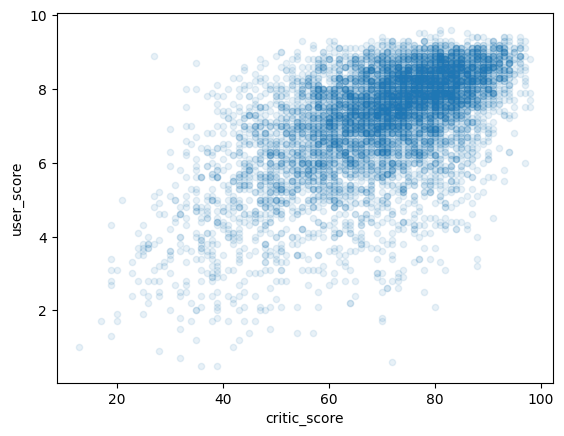

In [30]:
print( 'K(Пирсона)=', round(   data['critic_score'].corr(data['user_score']),2   )   )
data.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.1);

Значимой корреляции не прослеживается. Заполнить пропуски на основе корреляции не можем.

Сбросим индексы, чтобы в дальнейшем избежать неявных ошибок. Для проверки выведем контрольные данные до и после:

In [31]:
data.tail()

name platform  year_of_release       genre  \
16710  Samurai Warriors: Sanada Maru      PS3             2016      Action   
16711               LMA Manager 2007     X360             2006      Sports   
16712        Haitaka no Psychedelica      PSV             2016   Adventure   
16713               Spirits & Spells      GBA             2003    Platform   
16714            Winning Post 8 2016      PSV             2016  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16710      0.00      0.00      0.01          0.0           NaN         NaN   
16711      0.00      0.01      0.00          0.0           NaN         NaN   
16712      0.00      0.00      0.01          0.0           NaN         NaN   
16713      0.01      0.00      0.00          0.0           NaN         NaN   
16714      0.00      0.00      0.01          0.0           NaN         NaN   

      rating  total_sales  
16710    NaN         0.01  
16711    NaN         0.01  
16712    NaN         0.01  
16713    NaN         0.01  
16714    NaN         0.01

In [32]:
data = data.reset_index(drop=True)
data.tail()

name platform  year_of_release       genre  \
16438  Samurai Warriors: Sanada Maru      PS3             2016      Action   
16439               LMA Manager 2007     X360             2006      Sports   
16440        Haitaka no Psychedelica      PSV             2016   Adventure   
16441               Spirits & Spells      GBA             2003    Platform   
16442            Winning Post 8 2016      PSV             2016  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16438      0.00      0.00      0.01          0.0           NaN         NaN   
16439      0.00      0.01      0.00          0.0           NaN         NaN   
16440      0.00      0.00      0.01          0.0           NaN         NaN   
16441      0.01      0.00      0.00          0.0           NaN         NaN   
16442      0.00      0.00      0.01          0.0           NaN         NaN   

      rating  total_sales  
16438    NaN         0.01  
16439    NaN         0.01  
16440    NaN         0.01  
16441    NaN         0.01  
16442    NaN         0.01

### Вывод: подготовка данных
**В процессе предобработки данных было проделано:**
* преобразование названий столбцов в строчные буквы с символом "_";
* удалены строки с пропусками данных в столбцах * `'year_of_release'`, `'name'` и `'genre'`;
* тип данных столбца `'year_of_release'` преобразован в `int`;
* в столбце `'rating'` заменены устаревшие маркировки: EC и K-A на E, AO на M, RP на nan (значит, что рейтинг пока не присвоен);
* в столбце `'user_score'` заменили отсутствующие данные, обозначенные как tbd, на nan и преобразовали в формат `float64`;
* добавлены продажи по всем регионам в отдельный столбец `'total_sales'`;
* проведен поиск явных дубликатов, явных дубликатов не обнаружено;
* добавлен столбец `'lower_name'` для поиска неявных дубликатов;
* проведен поиск неявных дубликатов по столбцам `'lower_name'` и `'platform'`, выявлено 3. Два из которых оказались релизом и ремейком (то есть не дубликатами). По 1 произведено сложение количественных показателей, дубликат удален;
* после удаления неявных дубликатов столбец `'lower_name'` удален;
* для столбцов `'critic_score'` и `'user_score'` построена диаграмма рассеивания и посчитан коэффициент корреляции - значимая корреляция не прослеживается (К=0.58);

На основании последнего пункта делаем вывод, что заполнение столбца `'user_score'` синтетическими данными необосновано.

**Причины отсутствия данных.**

Практически все отсутствующие данные сосоредоточены в 3х столбцах - в рейтингах. Отсутствие данных можно объяснить тем, что не все выпускаемые игры привлекают внимание критиков и ESRB, не по всем набирается достаточное количество отзывов игроков.

Объем оставшихся данных после предобработки - 98.37%, что является хорошим показателем.

После всех преобразований проведен сброс индексов, чтобы восстановить целостность таблицы.

## Исследовательский анализ данных

Посмотрим на количество выпущенных игр по годам:

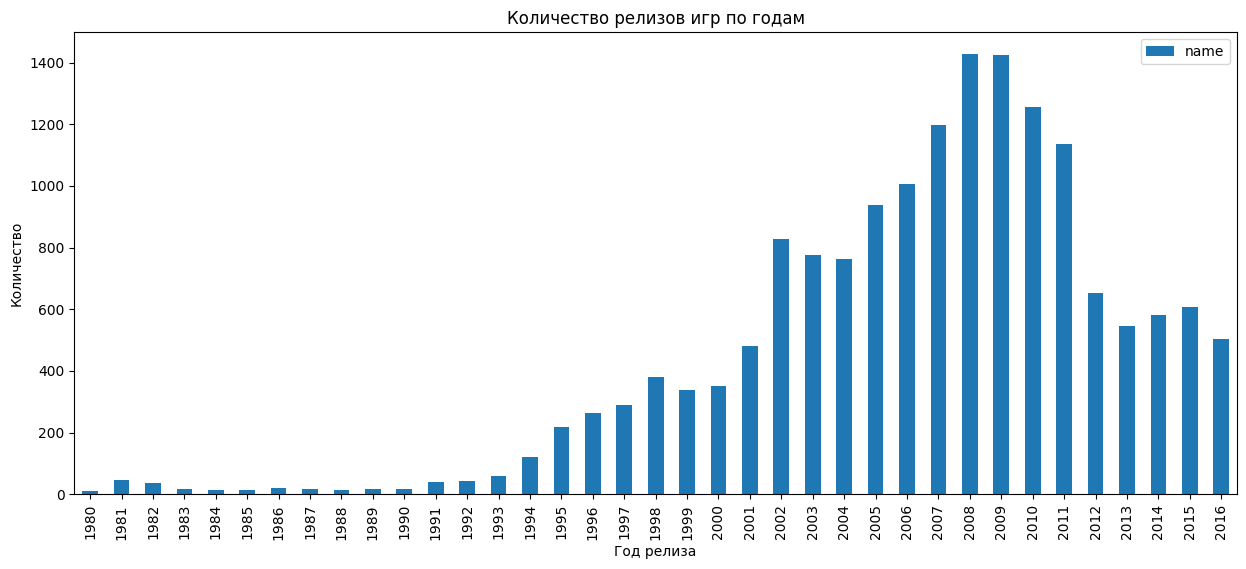

In [33]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count') \
    .plot(y='name', 
          kind='bar', 
          figsize = (15,6), 
          title='Количество релизов игр по годам', 
          xlabel='Год релиза', 
          ylabel='Количество');

Пик по количеству пришелся на 2008 -2009 годы. Начиная с 1993 и до этого периода наблюдается общий тренд на рост. После этого резкое падение до 2013 года, затем стабилизация рынка со значительно меньшей волатильностью.

**Продажи по платформам.**

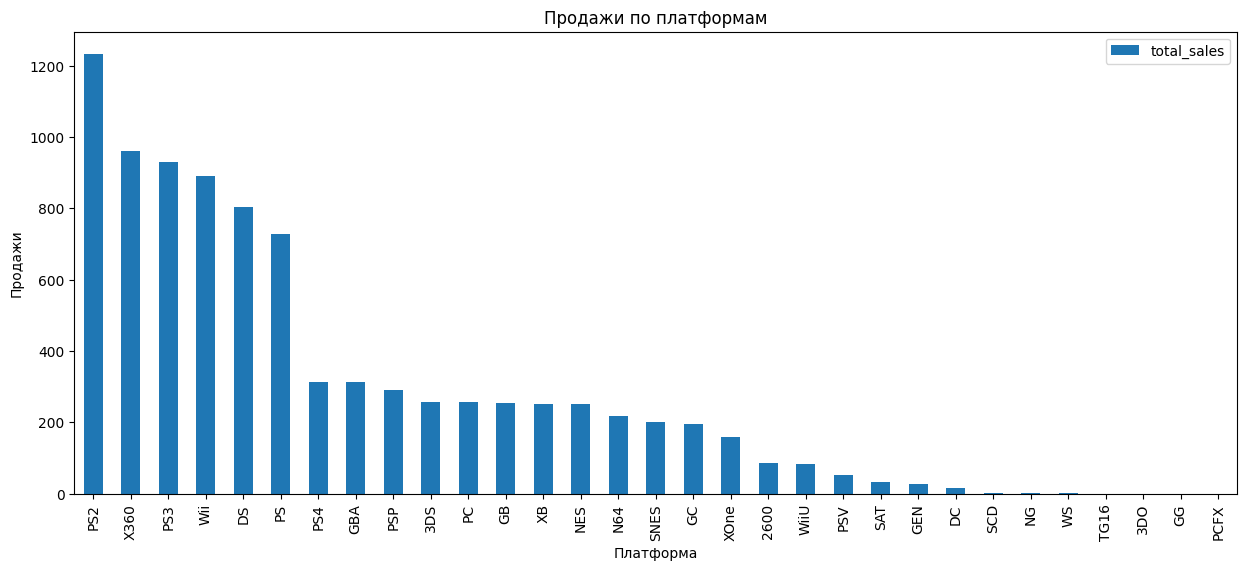

In [34]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values('total_sales', ascending=False) \
    .plot(y='total_sales', 
          kind='bar', 
          figsize = (15,6), 
          title='Продажи по платформам', 
          xlabel='Платформа', 
          ylabel='Продажи');

Посмотрим продажи по платформам в разрезе их доли и накопительной доли (сортировка по убыванию):

In [35]:
data_total_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values('total_sales', ascending=False)

In [36]:
data_total_sales['share'] = data_total_sales['total_sales'] / data_total_sales['total_sales'].sum()
data_total_sales['cum_share'] = data_total_sales['share'].cumsum()
data_total_sales.style.format({'total_sales' : '{:.1f}', 'share' : '{:.1%}', 'cum_share' : '{:.1%}'})

Посмотрим 11 наиболее доходных платформ по годам (они даютт практически 80% продаж):

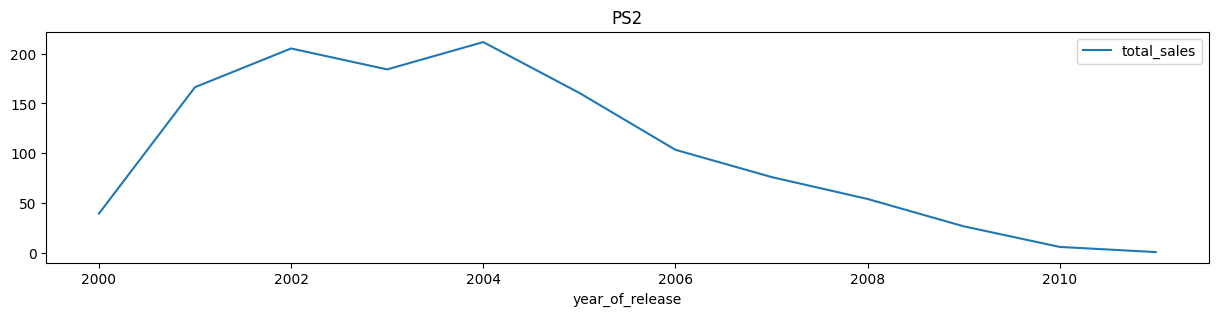

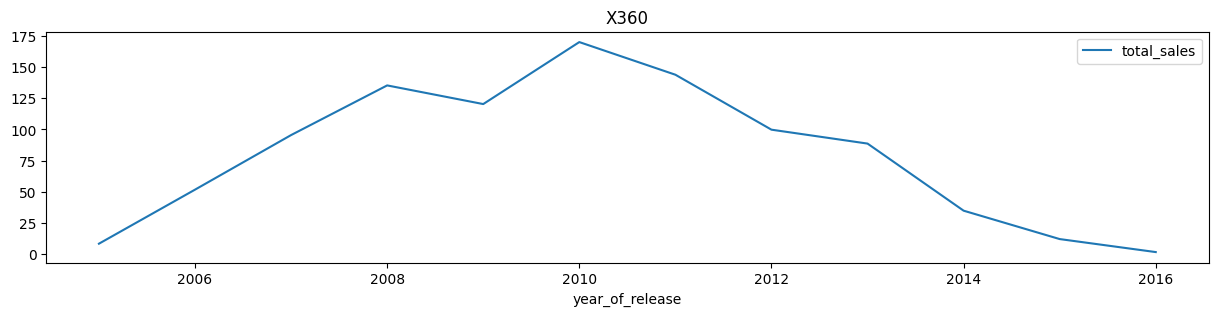

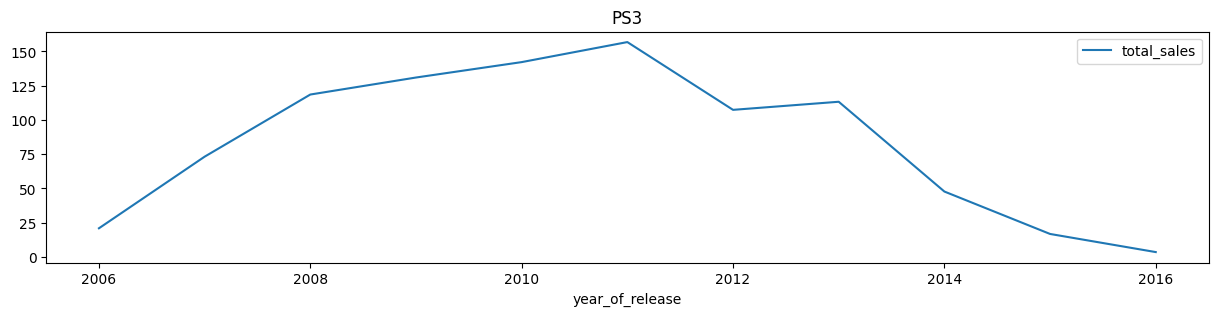

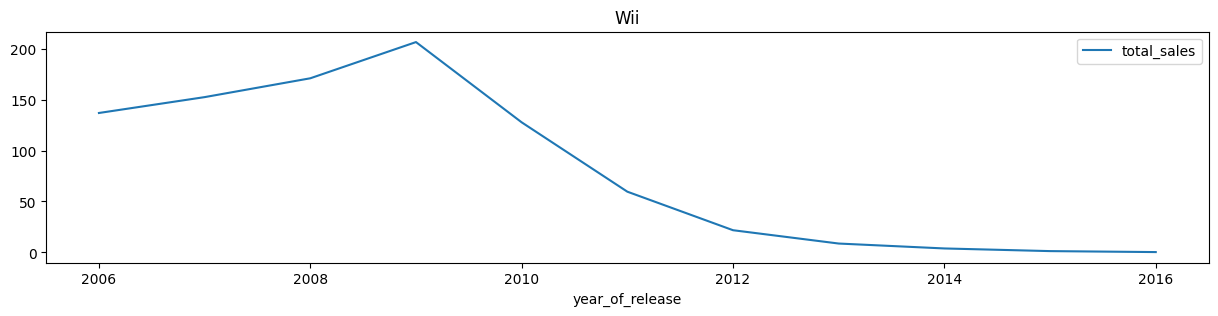

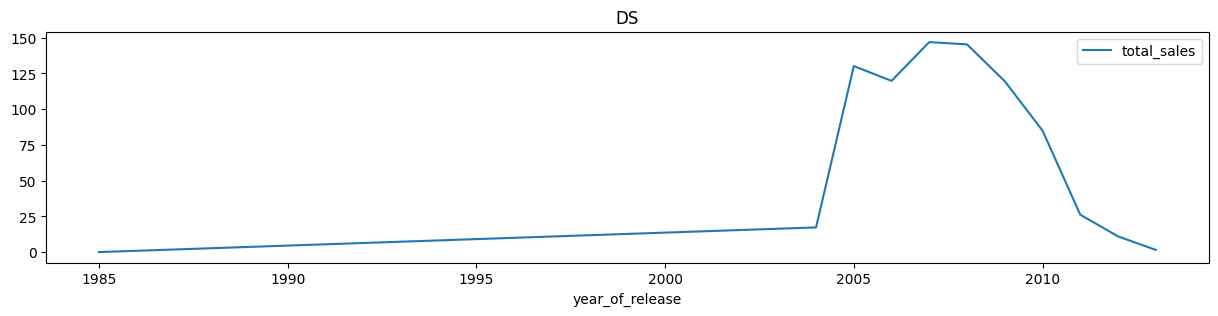

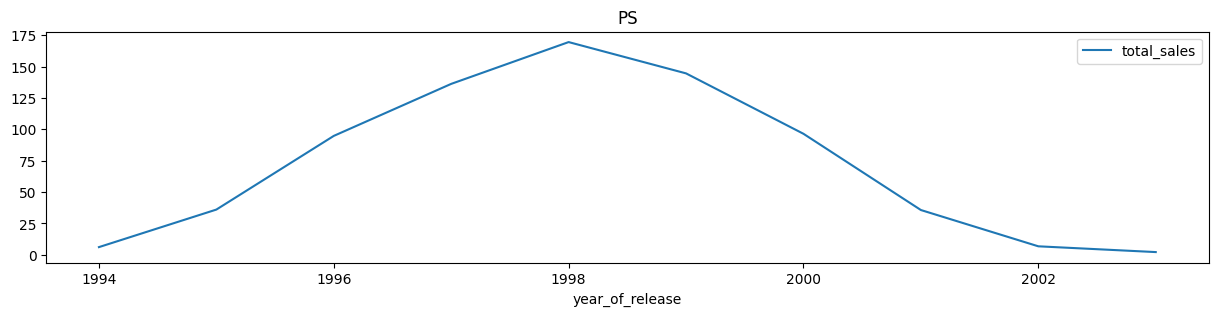

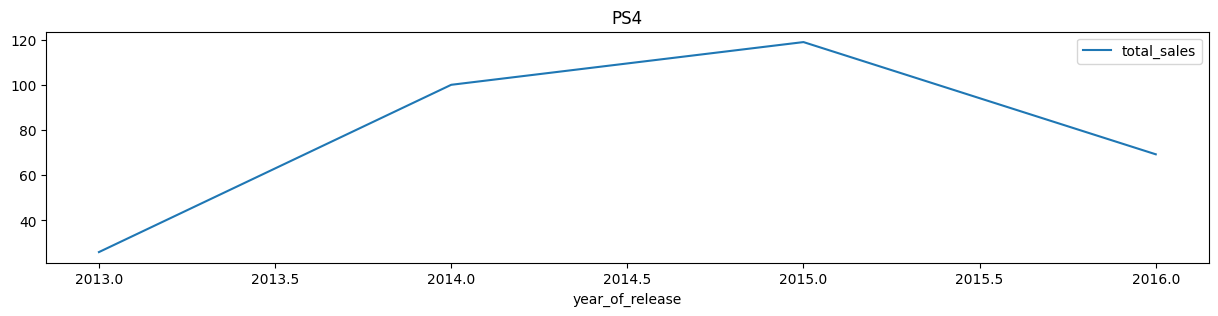

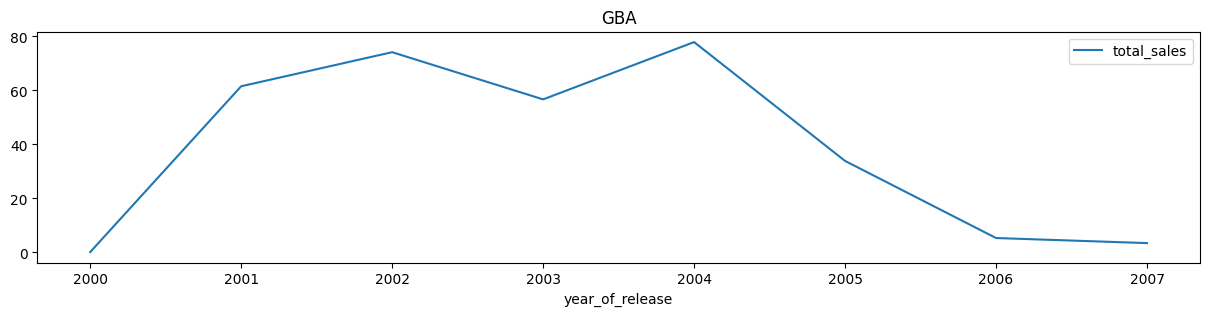

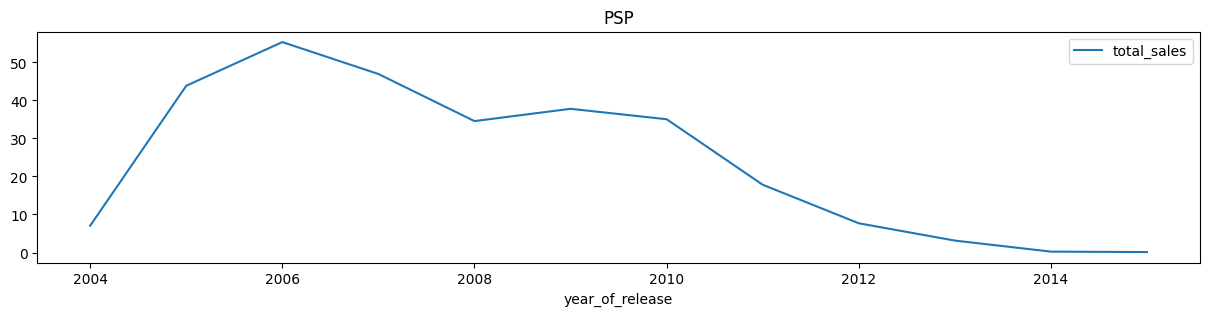

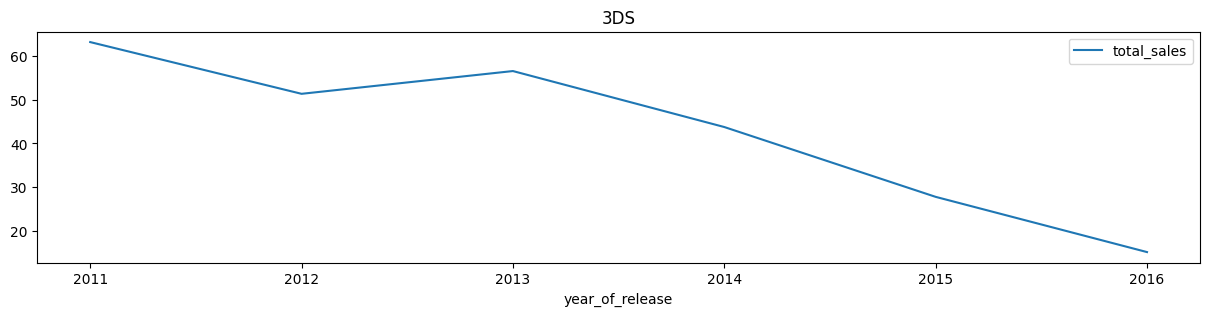

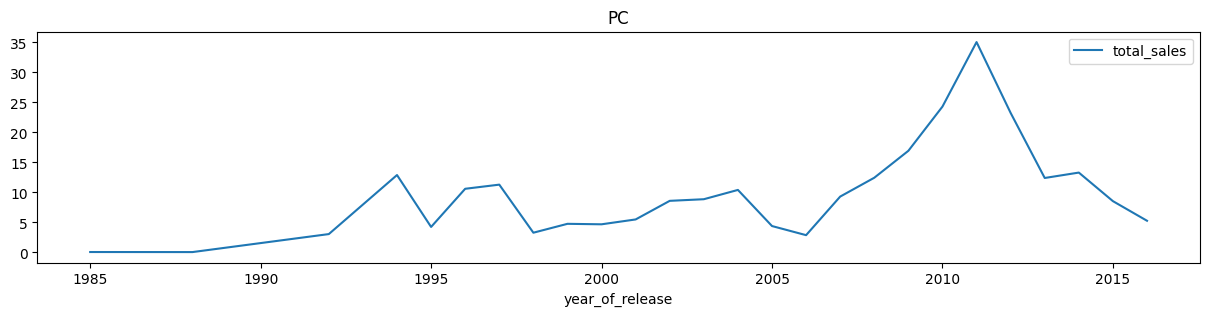

In [37]:
popular_platforms = data_total_sales.index.tolist()[:11]
for pl in popular_platforms :
    data.query('platform == @pl') \
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
        .plot(y='total_sales', kind='line', title=pl, figsize = (15,3));

Можно утверждать, что практически все платформы основную часть выручки приносят за период в 6 лет.

Посмотрим еще наиболее денежные платформы за последние 3 года (3 года - полупериод основной активности платформы, достаточно, чтобы увидеть тренд):

In [38]:
# обрежем датасет до трех последних лет и сохраним в копию
years = [2016, 2015, 2014]
data_3y = data.query('year_of_release in @years') 

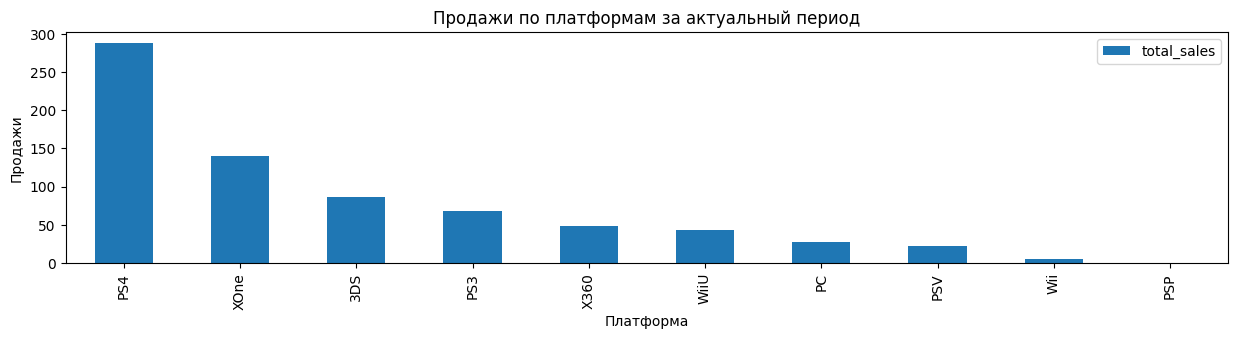

In [39]:
data_3y.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
        .sort_values('total_sales', ascending=False) \
        .plot(y='total_sales', 
              kind='bar', 
              figsize = (15,3), 
              title='Продажи по платформам за актуальный период', 
              xlabel='Платформа', 
              ylabel='Продажи');

А теперь посмотрим данные по каждой из актуальных платформ:

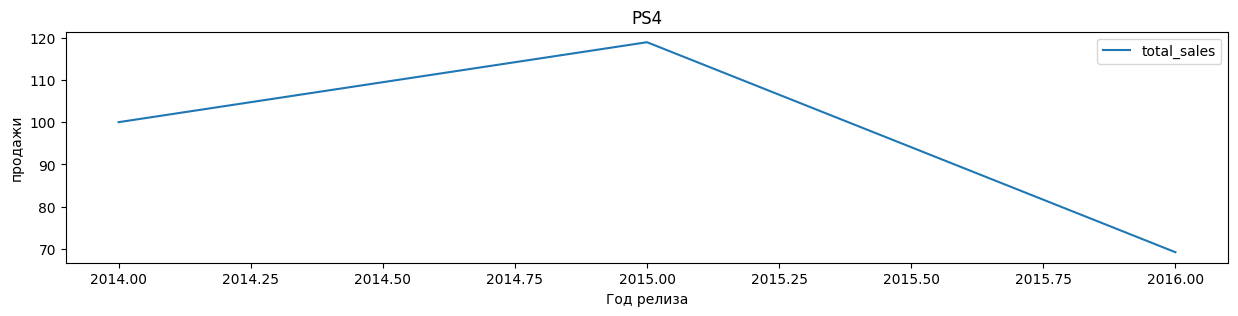

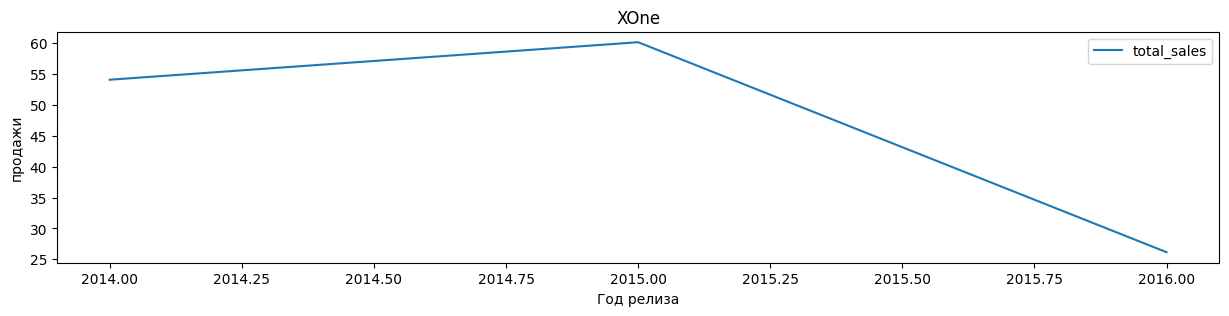

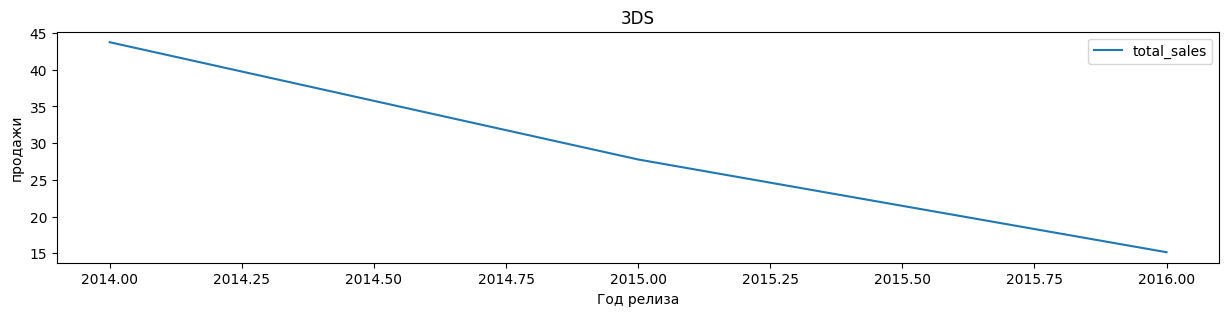

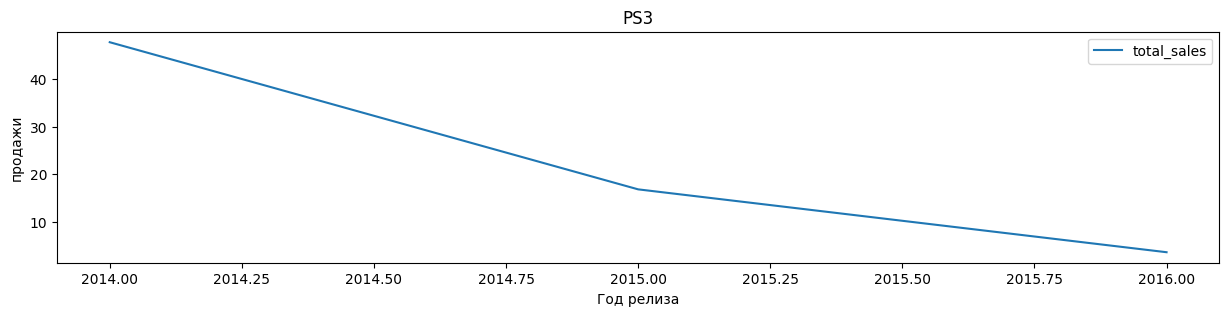

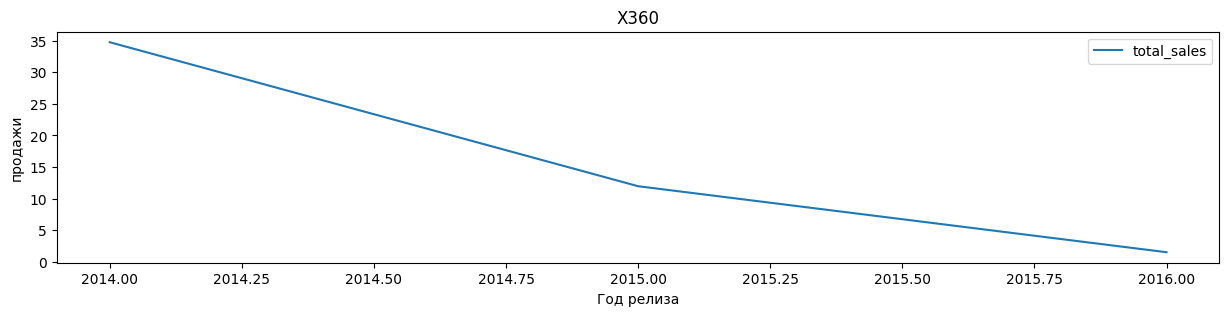

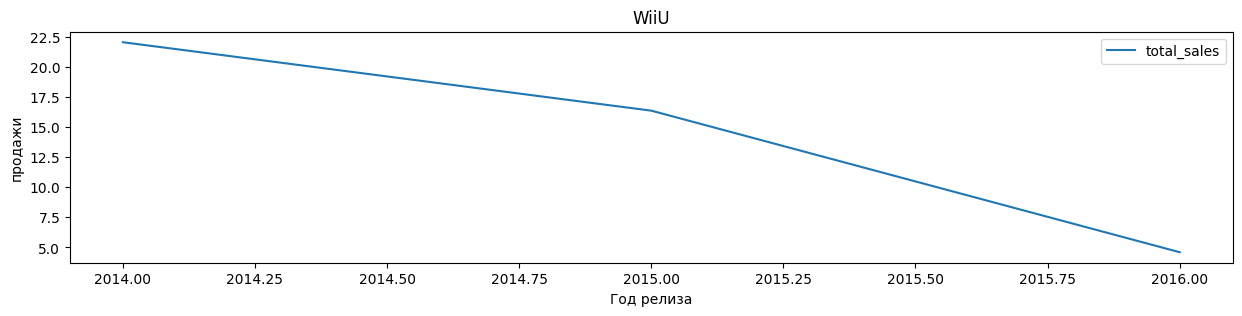

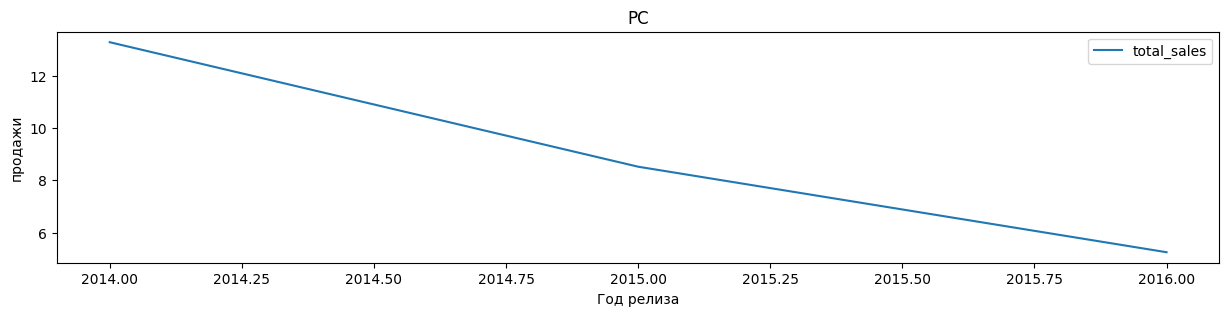

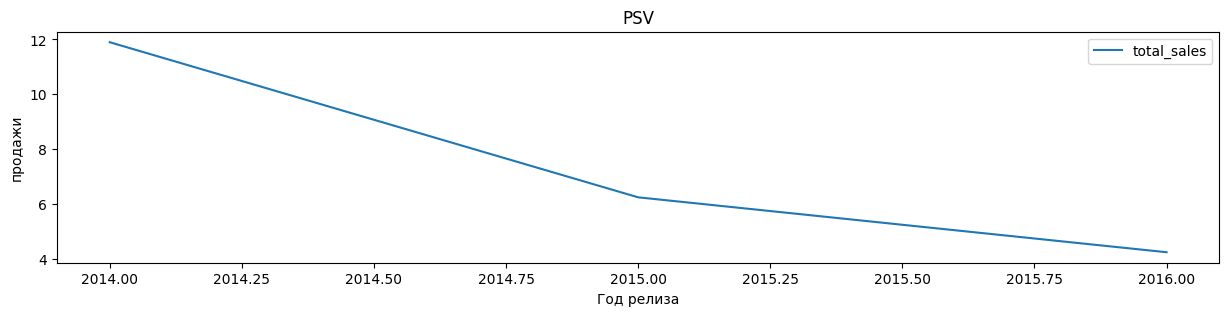

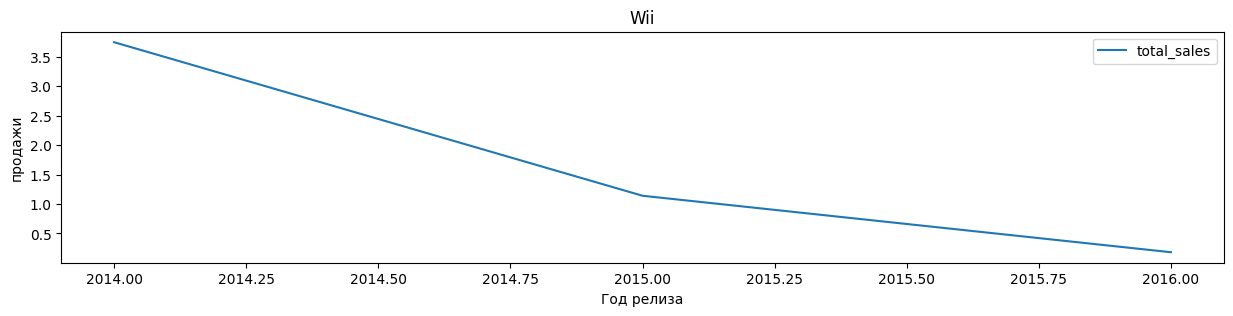

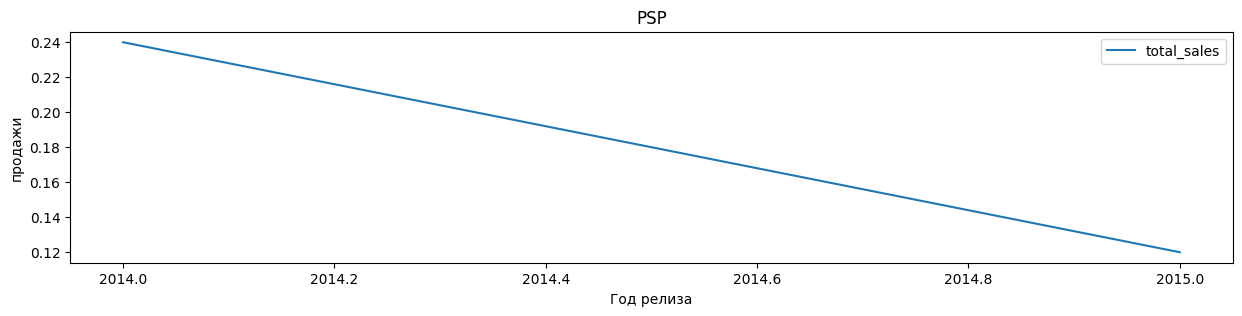

In [40]:
actual_platforms = data_3y.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                        .sort_values('total_sales', ascending=False) \
                        .index.tolist()
for pl in actual_platforms :
    data_3y.query('platform == @pl') \
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
        .plot(y='total_sales', kind='line', title=pl, figsize = (15,3), xlabel='Год релиза', ylabel='продажи');

Одна из 10 актуальных за последние 3 года платформ не дожила до 2016 года. Посмотрим распределение продаж за 2016 год по оставшимся 9:

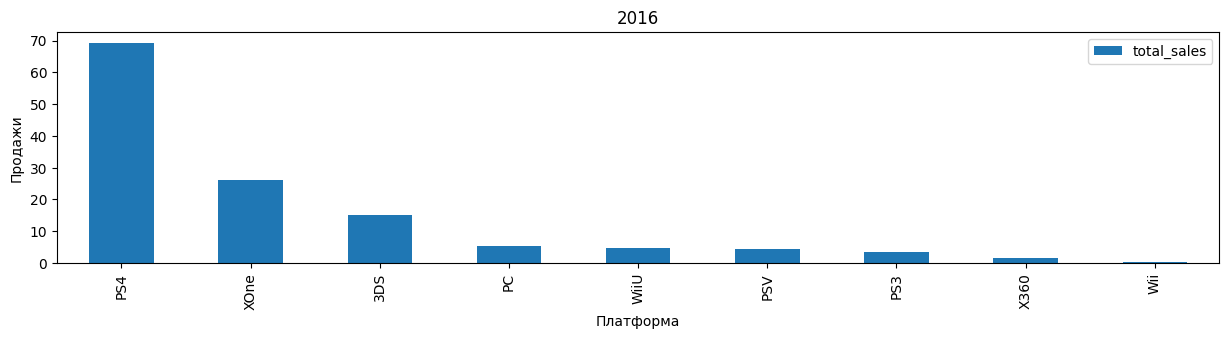

In [41]:
data.query('year_of_release == 2016') \
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values('total_sales', ascending=False) \
    .plot(y='total_sales', kind='bar', figsize = (15,3), title='2016', xlabel='Платформа', ylabel='Продажи');

Изменения по сравнению с трехлетним периодом есть, но ничего неординарного. В ИТ индустрии, в том числе игровой, изменения могут происходить очень быстро, поэтому не факт, что тренд за определенный период актуален в настоящее время. Поэтому смотрим разницу в показателях за три года и за последний.

In [42]:
data_2016 = data.query('year_of_release == 2016') \
                .pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                .sort_values('total_sales', ascending=False)
data_2016['share'] = data_2016['total_sales'] / data_2016['total_sales'].sum()
data_2016['cum_share'] = data_2016['share'].cumsum()
data_2016.style.format({'total_sales' : '{:.1f}' ,'share' : '{:.1%}', 'cum_share' : '{:.1%}'})

Для сравнения посмотрим данные за последние 3 года:

In [43]:
data_last_3 = data_3y.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                .sort_values('total_sales', ascending=False)
data_last_3['share'] = data_last_3['total_sales'] / data_last_3['total_sales'].sum()
data_last_3['cum_share'] = data_last_3['share'].cumsum()
data_last_3.style.format({'total_sales' : '{:.1f}' ,'share' : '{:.1%}', 'cum_share' : '{:.1%}'})

Различия в долях за год и за три года есть, что естесственно. Разумно оставить период исследования три года 2014 - 2016.

Только 2 первые платформы,  PS4 и XOne, показывают на периоде в 3 года разнонаправленный тренд с пиком в 2015 году, что позволяет говорить о том, что они могут быть актуальны еще 2 года.

**Нисходящее направление всех 9 актуальных платформ указывает на то, что появление новой платформы очень вероятно в ближайшем будущем - необходимы контакты с вендорами на предмет выхода новой платформы и обеспечения совместимости с ней нашего продукта.**

Из текущих платформ для маркетинга представляют интерес первые семь, до PC включительно.

Построим диаграмму размаха по по глобальным продажам игр в разбивке по платформам за последние 3 года:

period= [2016, 2015, 2014]


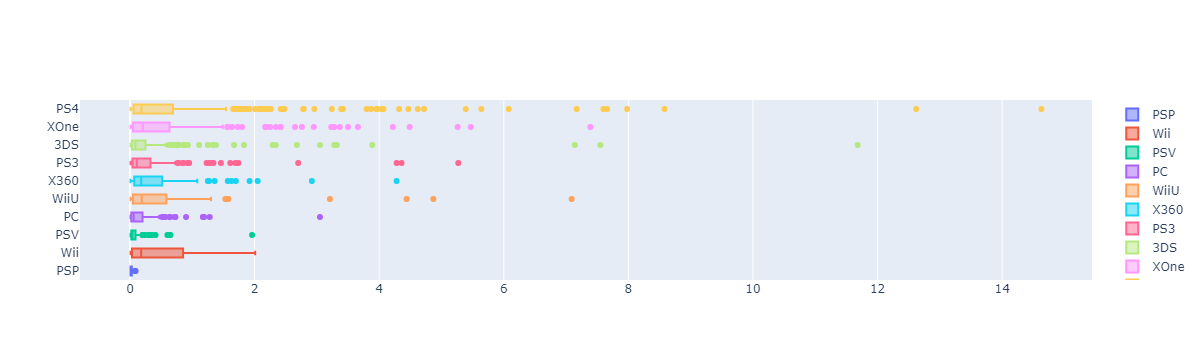

In [44]:
platforms_by_sales = data_3y.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                         .sort_values('total_sales') \
                         .index.tolist()
print('period=', years )
fig = go.Figure()

for pl in platforms_by_sales :
    fig.add_trace(go.Box(x=data_3y[ data_3y['platform'] == pl]['total_sales'], name=pl))
fig.show()

Не очень информативно, увеличим масштаб:

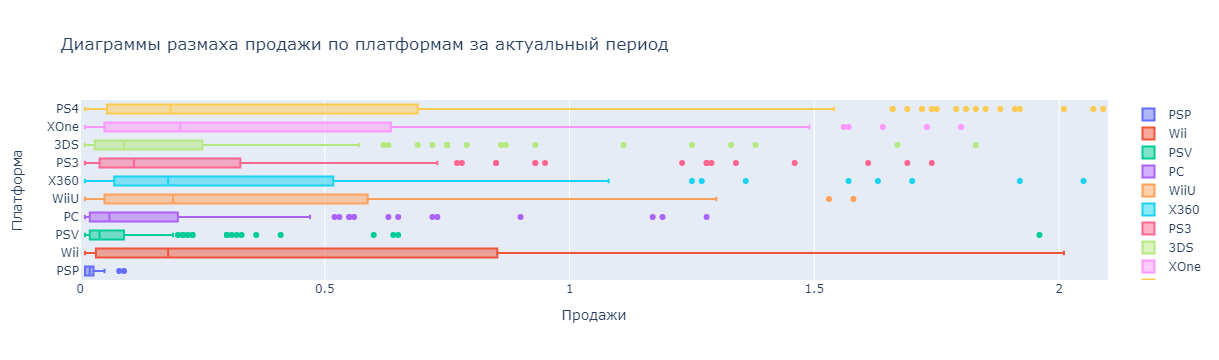

In [45]:
platforms_by_sales = data_3y.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                         .sort_values('total_sales') \
                         .index.tolist()

fig = go.Figure()

for pl in platforms_by_sales :
    fig.add_trace(go.Box(x=data_3y[ data_3y['platform'] == pl]['total_sales'], name=pl))
fig.update_xaxes(range=[0, 2.1])
fig.update_layout(title='Диаграммы размаха продажи по платформам за актуальный период',
                 xaxis_title='Продажи',
                 yaxis_title='Платформа')
fig.show()

Хорошо видно, что при достаточно больших выбросах вправо медианные значения находятся в достаточно узком диапазоне.

Построим такой же график для 2016 года:

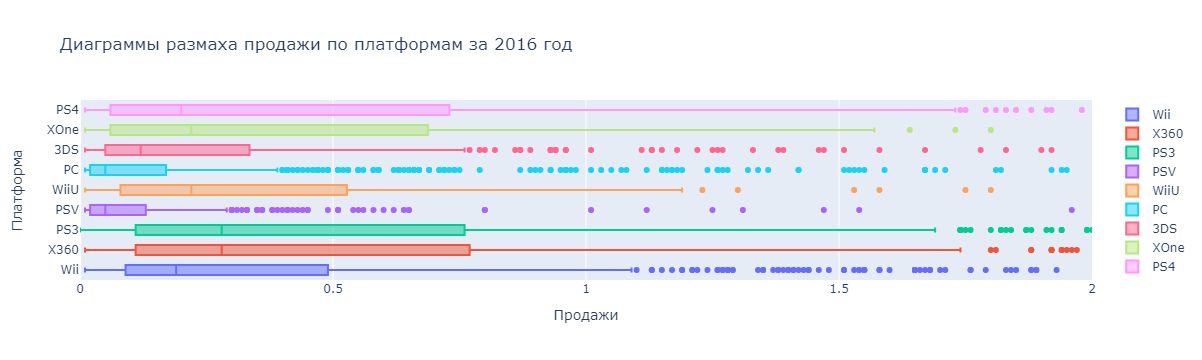

In [46]:
platforms_by_sales = data[data['year_of_release'] == 2016].pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                         .sort_values('total_sales') \
                         .index.tolist()
fig = go.Figure()

for pl in platforms_by_sales :
    fig.add_trace(go.Box(x=data[ data['platform'] == pl]['total_sales'], name=pl))
fig.update_xaxes(range=[0, 2])
fig.update_layout(title='Диаграммы размаха продажи по платформам за 2016 год',
                 xaxis_title='Продажи',
                 yaxis_title='Платформа')
fig.show()

Для двух самых перспективных из имеющихся на настоящее время - PS4 и XOne - медианы практически не отличаются. И оба значения лишь незначительно  отличаются от медианных за весь период в 3 года. Разброс тоже практически совпадает. 

Выбросы по платформам различаются. Чем больше выбросов, тем менее однородная аудитория платформы. самые неоднородные платформы - PSV, PC, 3DS. WiiU примерно посредине. За исключением PC, остальные 3 - это мобильные платформы. То есть можно сказать, что аудитория стационарных платформ более однородная. Платформа PC по структуре своей аудитории совпадает с мобильными платформами и не похожа на стационарные.

Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Сначала посчитаем корреляцию между отзывами критиков и продажами:

PS4 K(Пирсона)= 0.4
XOne K(Пирсона)= 0.43
3DS K(Пирсона)= 0.31
PS3 K(Пирсона)= 0.45
X360 K(Пирсона)= 0.53
WiiU K(Пирсона)= 0.37
PC K(Пирсона)= 0.17
PSV K(Пирсона)= 0.04
Wii K(Пирсона)= nan
PSP K(Пирсона)= nan


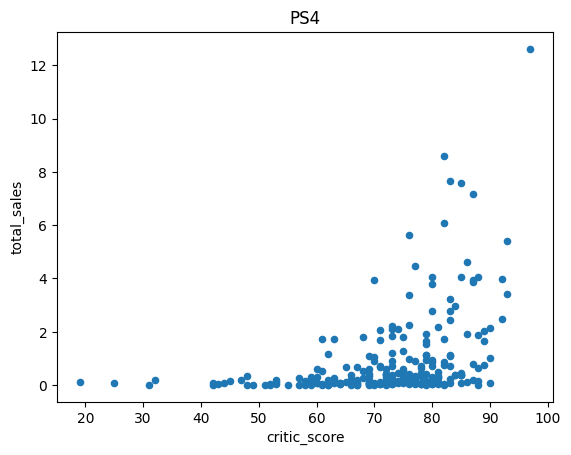

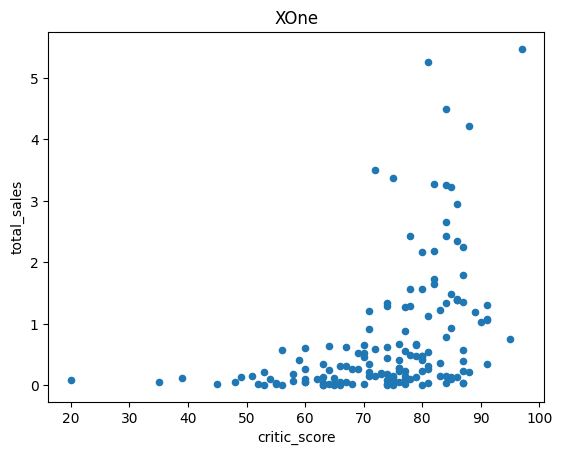

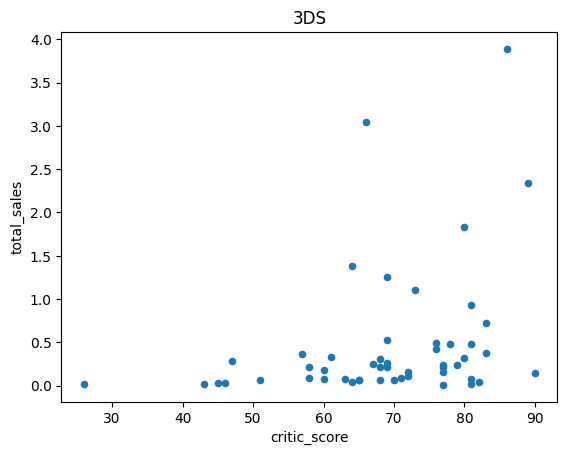

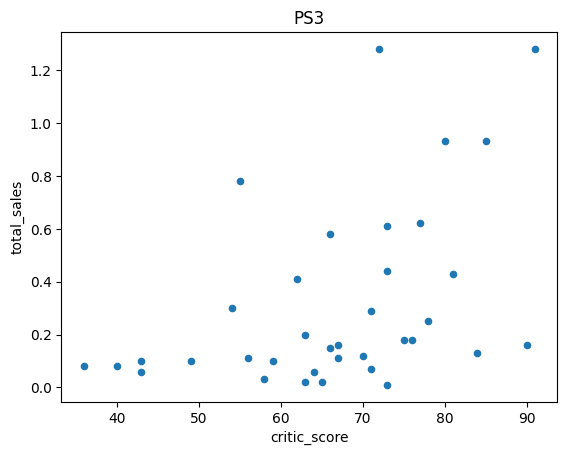

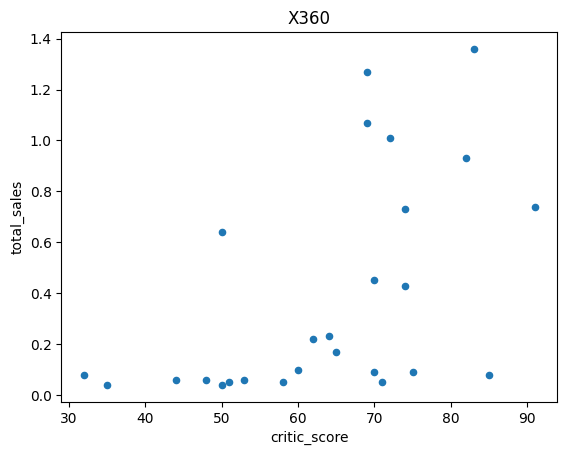

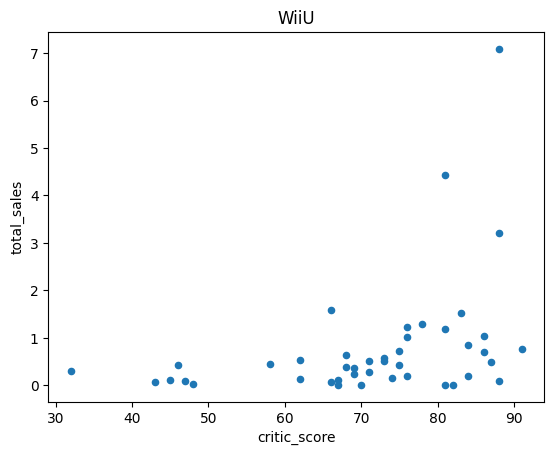

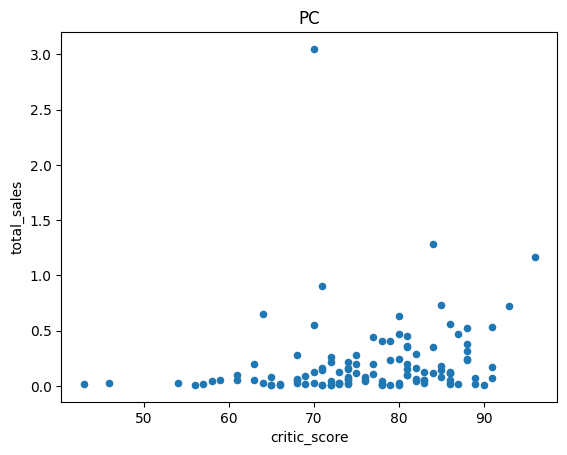

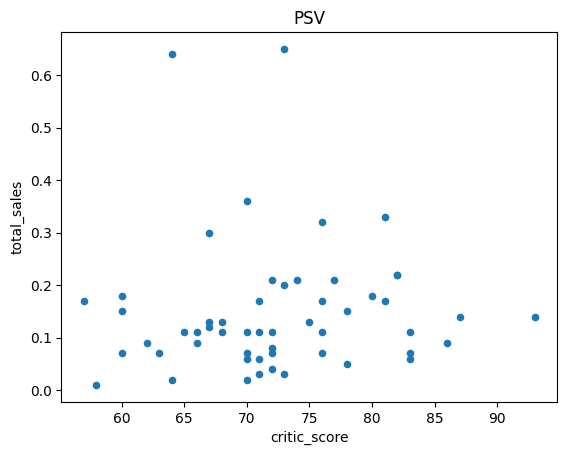

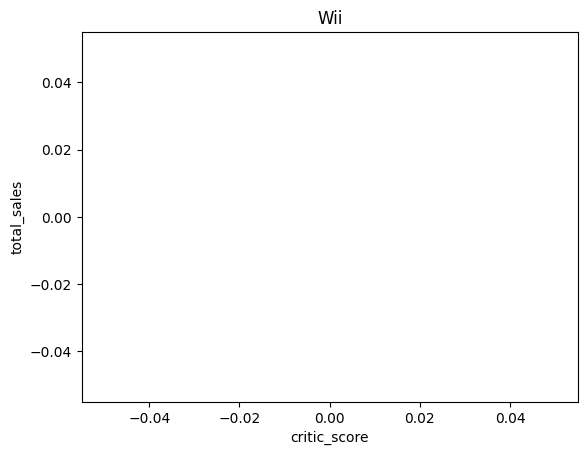

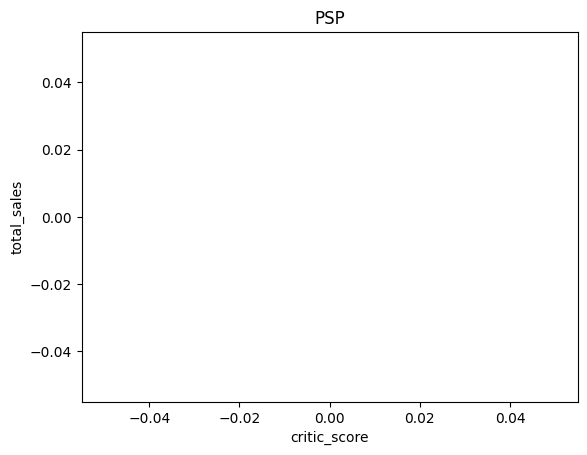

In [47]:
platforms_by_sales = data_3y.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                         .sort_values('total_sales', ascending=False) \
                         .index.tolist()

# для контроля выведем значения переменных, по которым делаем аналитику
# print('period=', years)
# print('platforms=', platforms_by_sales, '\n')

# сама аналитика
for pl in platforms_by_sales :
    print(pl, 'K(Пирсона)=', round( data_3y.query('platform == @pl')['total_sales'] \
                                     .corr(data_3y.query('platform == @pl')['critic_score']), 2) )
    data_3y.query('platform == @pl') \
        .plot(x='critic_score', y='total_sales', kind='scatter', title=pl);

На основании визуализации данных можно сделать вывод, что низкий рейтинг гарантирует крайне незначительные продажи. Это не означает, что высокий рейтинг обеспечит продажи, но рассматривать продукт с Рейтингом критиков ниже 60 не имеет смысла, это гарантированный провал. Для рейтинга от 60 до 70 должны быть очень веские обоснования. Рекомендуемый рейтинг - не ниже 70.

Теперь посмотрим на корреляцию между отзывами пользователей и продажами:

PS4 K(Пирсона)= -0.04
XOne K(Пирсона)= -0.07
3DS K(Пирсона)= 0.22
PS3 K(Пирсона)= -0.17
X360 K(Пирсона)= -0.14
WiiU K(Пирсона)= 0.41
PC K(Пирсона)= -0.07
PSV K(Пирсона)= -0.17
Wii K(Пирсона)= 1.0
PSP K(Пирсона)= nan


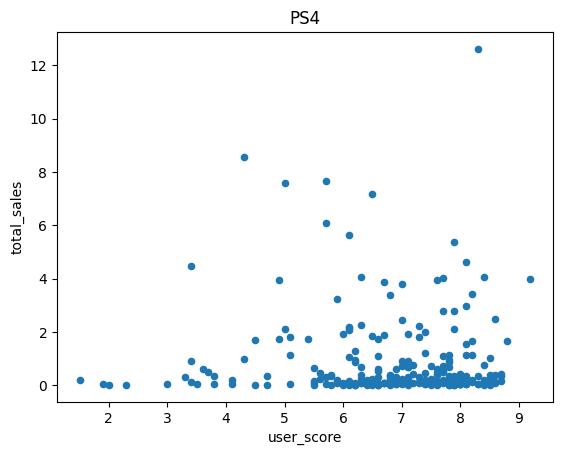

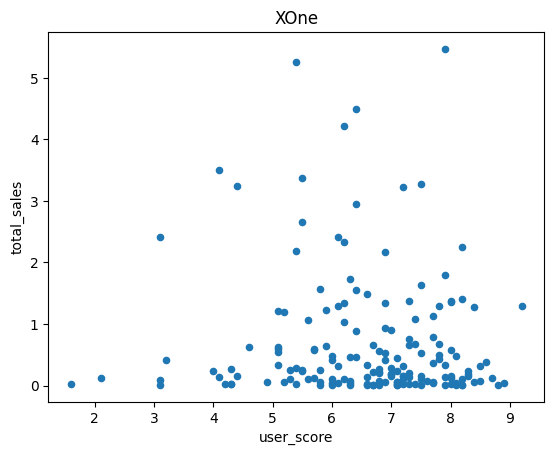

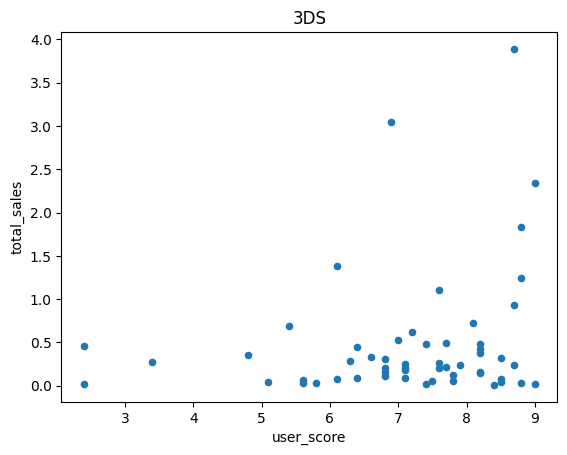

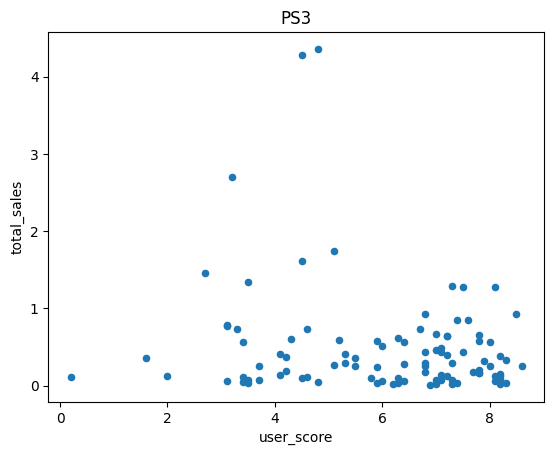

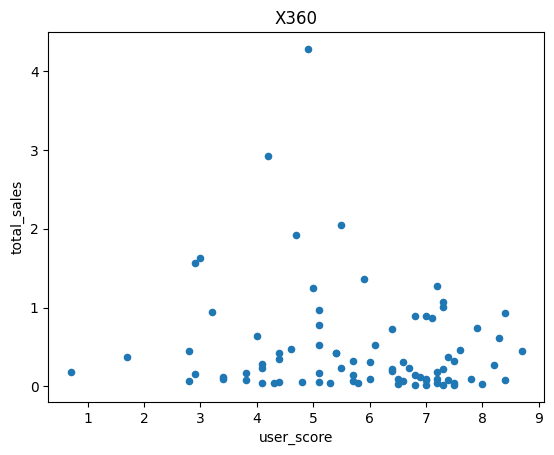

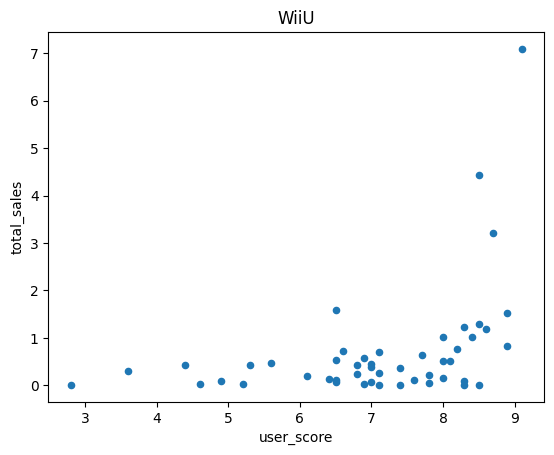

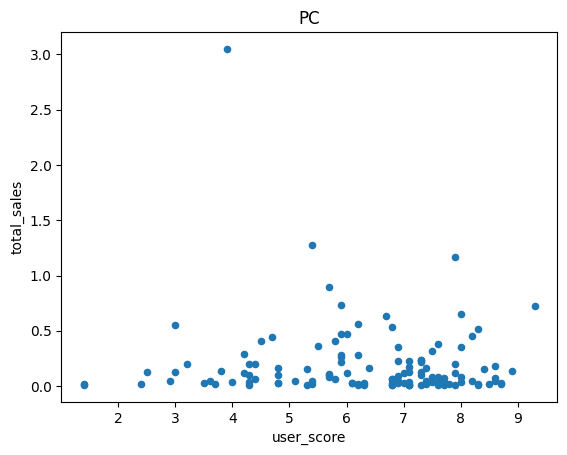

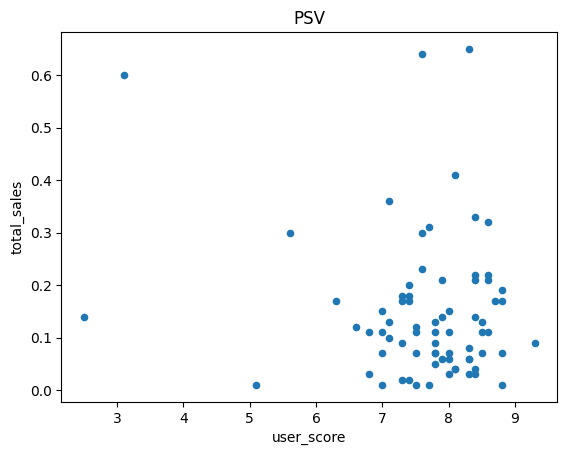

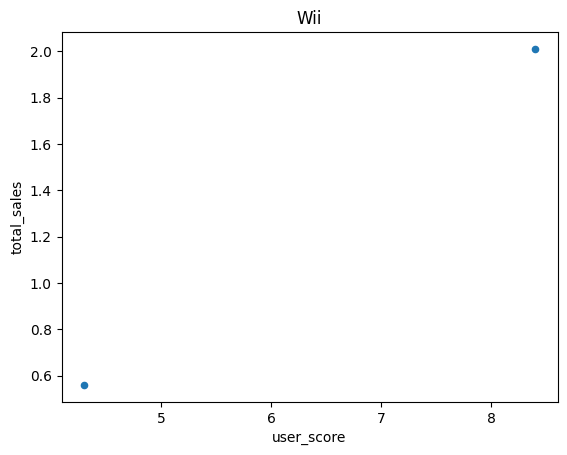

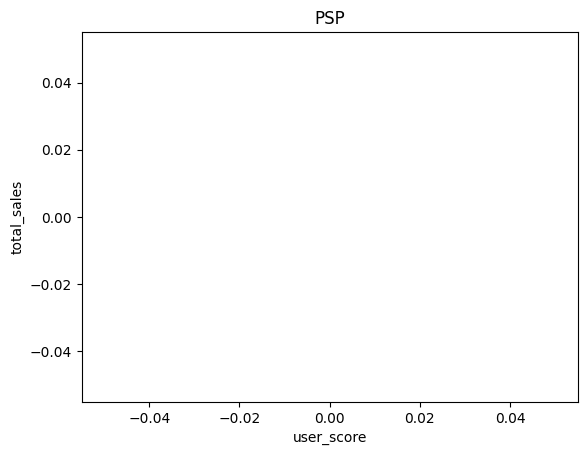

In [48]:
platforms_by_sales = data_3y.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                         .sort_values('total_sales', ascending=False) \
                         .index.tolist()

# для контроля выведем значения переменных, по которым делаем аналитику
# print('period=', years)
# print('platforms=', platforms_by_sales, '\n')

# сама аналитика
for pl in platforms_by_sales :
    print(pl, 'K(Пирсона)=', round( data_3y.query('platform == @pl')['total_sales'] \
                                     .corr(data_3y.query('platform == @pl')['user_score']), 2) )
    data_3y.query('platform == @pl') \
        .plot(x='user_score', y='total_sales', kind='scatter', title=pl);

Низкие отзывы пользователей гарантируют плохие продажи, но и высокий балл по отзывам также не гарантирует высоких продаж. Для всех платформ хорошие продажи находятся в интервале. У каждой оптимальный диапазон свой платформы он свой:
* PS4: 4-9 балла
* XOne: 4-8 балла
* 3DS: 7-9 балла
* PS3: 3-5 балла
* X360: 3-6 балла
* WiiU: 8.5-9 баллов
* PC: 4-6 балла
* PSV: 7-9 балла
* Wii: нет данных
* PS: нет данных

Если брать усредненный диапазон, то для большинства платформ это 4-6 баллов, исключение составляют 2 мобильные платформы, 3DS: 7-9 балла и WiiU: 8.5-9 баллов.

**Теперь перейдем к анализу по жанрам.**

Посмотрим, что с количеством игр продажами по жанрам.

Продажи по жанрам:

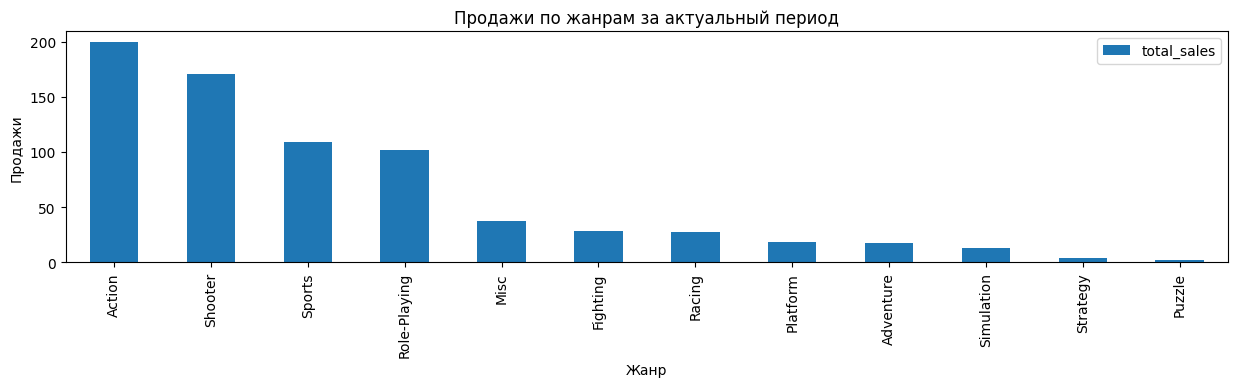

In [50]:
data_3y.pivot_table(index='genre', values='total_sales', aggfunc='sum') \
    .sort_values('total_sales', ascending=False) \
    .plot(y='total_sales', 
          kind='bar', 
          figsize = (15,3), 
          title='Продажи по жанрам за актуальный период', 
          xlabel='Жанр', 
          ylabel='Продажи');

Самые популярные - Action, Shooter, Sports.

Теперь посмотрим на количество игр по жанрам. Достаточно поменять метод подсчета с `sum` на `count`, и мы получим количество (этот столбец у нас не имеет пропусков):

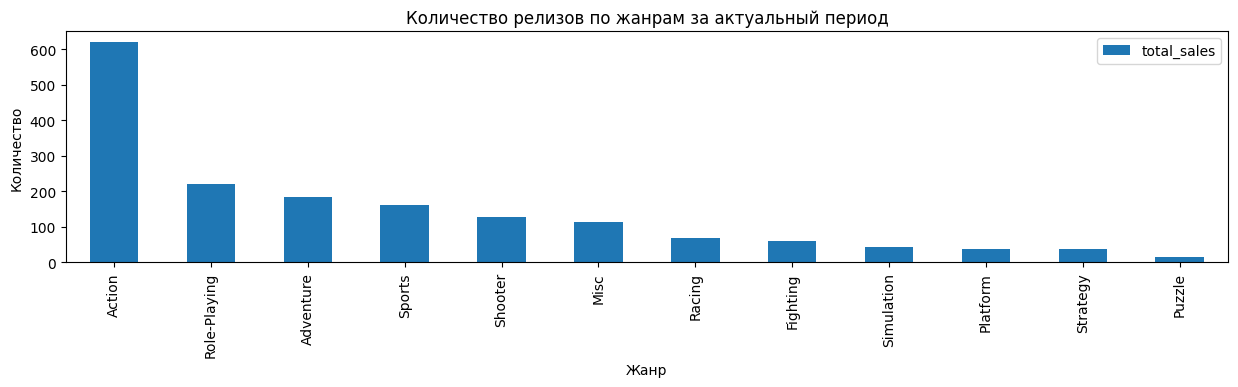

In [51]:
data_3y.pivot_table(index='genre', values='total_sales', aggfunc='count') \
    .sort_values('total_sales', ascending=False) \
    .plot(y='total_sales', 
          kind='bar', 
          figsize = (15,3), 
          title='Количество релизов по жанрам за актуальный период', 
          xlabel='Жанр', 
          ylabel='Количество');

Получается интересная картина, выручка не коррелирует с количеством игр. В топе Action, Role-Playing, Adventure.

Тогда посмотрим на удельную выручку, она даст самые прибыльные жанры в пересчете на одну игру:

In [52]:
# посчитаем продажи
genre_sales = data_3y.pivot_table(index='genre', values='total_sales', aggfunc='sum') 

# посчитаем количество игр по столбцу 'name' - это корректно, он не содержит пропусков
genre_count = data_3y.pivot_table(index='genre', values='name', aggfunc='count').rename(columns={'name':'qty'})

# объединим данные в одну таблицу
genre_sales = genre_sales.join(genre_count)

# посчитаем продажи на единицу
genre_sales['sales_per_unit'] = genre_sales['total_sales'] / genre_sales['qty']

# отсортируем, отформатируем и выведем на экран
genre_sales.sort_values('sales_per_unit', ascending=False) \
           .style.format({'total_sales' : '{:.2f}', 'sales_per_unit' : '{:.2f}'})

Лидер определился - это Шутеры. Побеждают с большим отрывом.

### Вывод: исследовательский анализ

**Количество игр.**

Пик по количеству выпущенных игр пришелся на 2008 -2009 годы. Начиная с 1993 и до этого периода наблюдается общий тренд на рост. После этого резкое падение до 2013 года, затем стабилизация рынка со значительно меньшей волатильностью.

**Актуальный период.**
<br>На основании проведенного анализа можно установить актуальный период с 2014 по 2016 годы.

**Продажи по платформам.**
<br>11 наиболее доходных платформ по годам (они дали практически 80% продаж):
* PS2
* X360
* PS3
* Wii
* DS
* PS
* PS4
* GBA
* PSP
* 3DS
* GB

Можно утверждать, что практически все платформы основную часть выручки приносят за период в 6 лет.

Наиболее денежные платформы за последние 3 года (3 года - полупериод основной активности платформы, достаточно, чтобы увидеть тренд):
* PS4
* XOne
* 3DS
* PS3
* X360
* WiiU
* PC
* PSV
* Wii
* PSP


**Актуальные платформы:**
<br>Одна из 10 актуальных за последние 3 года платформ - PSP - не дожила до 2016 года. 

Только 2 первые платформы, PS4 и XOne, показывают на периоде в 3 года разнонаправленный тренд с пиком в 2015 году, что позволяет говорить о том, что они могут быть актуальны еще 2 года.

**Важно!
Нисходящее направление всех 9 актуальных платформ указывает на то, что появление новой платформы очень вероятно в ближайшем будущем - необходимы контакты с вендорами на предмет выхода новой платформы и обеспечения совместимости с ней нашего продукта.**

Из текущих платформ для маркетинга представляют интерес первые семь, до PC включительно:
* PS4
* XOne
* 3DS
* PS3
* X360
* WiiU
* PC

**Диаграмма размаха**
<br>По глобальным продажам игр в разбивке по платформам за последние 3 года:
<br>Хорошо видно, что при достаточно больших выбросах вправо, медианные значения находятся в достаточно узком диапазоне.

То же только для 2016 года:
<br>Для двух самых перспективных из имеющихся на настоящее время - PS4 и XOne - медианы практически не отличаются. И оба значения лишь незначительно отличаются от медианных за весь период в 3 года. Разброс тоже практически совпадает.

Выбросы по платформам различаются. Чем больше выбросов, тем менее однородная аудитория платформы. самые неоднородные платформы - PSV, PC, 3DS. WiiU примерно посредине. За исключением PC, остальные 3 - это мобильные платформы. То есть можно сказать, что аудитория стационарных платформ более однородная. Платформа PC по структуре своей аудитории совпадает с мобильными платформами и не похожа на стационарные.

**Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.**

Корреляция между отзывами критиков и продажами:
<br>На основании визуализации данных можно сделать вывод, что низкий рейтинг гарантирует крайне незначительные продажи. Это не означает, что высокий рейтинг обеспечит продажи, но рассматривать продукт с Рейтингом критиков ниже 60 не имеет смысла, это гарантированный провал. Для рейтинга от 60 до 70 должны быть очень веские обоснования. Рекомендуемый рейтинг - не ниже 70.

Корреляция между отзывами пользователей и продажами:
<br>Низкие отзывы пользователей гарантируют плохие продажи, но и высокий балл по отзывам также не гарантирует высоких продаж. Для всех платформ хорошие продажи находятся в интервале. У каждой оптимальный диапазон свой платформы он свой:
* PS4: 4-9 балла
* XOne: 4-8 балла
* 3DS: 7-9 балла
* PS3: 3-5 балла
* X360: 3-6 балла
* WiiU: 8.5-9 баллов
* PC: 4-6 балла
* PSV: 7-9 балла
* Wii: нет данных
* PS: нет данных

Если брать усредненный диапазон, то для большинства платформ это 4-6 баллов, исключение составляют 2 мобильные платформы, 3DS: 7-9 балла и WiiU: 8.5-9 баллов.

**Причина пропусков данных**
<br>С ростом количества выпускаемых игр, с большой вероятностью не все игры получают достаточное количество оченок для составления рейтинга.
<br>При этом детальное исследование данного вопроса невозможно на основании анализируемого датасета и выходит за рамки текущего исследования.

**Количество и продажи игр по жанрам.**

Продажи по жанрам:
<br>Самые популярные - Action, Shooter, Sports.

Количество игр по жанрам:
<br>Выручка не коррелирует с количеством игр. 
<br>В топе Action, Role-Playing, Adventure.

Удельная выручка по жанрам (позволяет корректно таргетировать маркетинговые расходы):
<br>Лидер  - Шутеры. Побеждают с большим отрывом. Затем идут Sports	и Platform.

## Портрет пользователя каждого региона

Базируясь на данных за последние три года посмотрим на профиль пользователя по трем регионам: 
<br>Северная Америка, Европа, Япония:

In [53]:
data_3y.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   
87       Shooter      2.99      3.49      0.22         1.28           NaN   

    user_score rating  total_sales  
31         NaN    NaN        14.63  
42         8.3      M        12.62  
47         NaN    NaN        11.68  
77         4.3      E         8.58  
87         NaN    NaN         7.98

Распределение по платформам по регионам:

In [54]:
# посчитаем продажи, их распределение и топ5 по платформам для Северной Америки:
data_na = data_3y.pivot_table(index='platform', values='na_sales', aggfunc='sum')
data_na['na_share'] = data_na['na_sales'] / sum(data_na['na_sales'])
top5_na = data_na.nlargest(5, ['na_share'])

# посчитаем продажи, их распределение и топ5 по платформам для Европы:
data_eu = data_3y.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
data_eu['eu_share'] = data_eu['eu_sales'] / sum(data_eu['eu_sales'])
top5_eu = data_eu.nlargest(5, ['eu_share'])

# посчитаем продажи, их распределение и топ5 по платформам для Японии:
data_jp = data_3y.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
data_jp['jp_share'] = data_jp['jp_sales'] / sum(data_jp['jp_sales'])
top5_jp = data_jp.nlargest(5, ['jp_share'])

# посчитаем общие продажи и их распределение по платформам (референсные значения):
data_total = data_3y.pivot_table(index='platform', values='total_sales', aggfunc='sum')
data_total['total_share'] = data_total['total_sales'] / sum(data_total['total_sales'])

# построим общую таблицу для всех регионов:
region_sales = data_na.join([data_eu, data_jp, data_total])

# рассчитаем доли продаж для каждого из регионов:
na_sales_share = round( sum(region_sales['na_sales']) / sum(region_sales['total_sales'] ) * 100, 1 )
eu_sales_share = round( sum(region_sales['eu_sales']) / sum(region_sales['total_sales'] ) * 100, 1 )
jp_sales_share = round( sum(region_sales['jp_sales']) / sum(region_sales['total_sales'] ) * 100, 1 )

# отсортируем по глобальным продажам, отформатируем и выведем на экран результат
h2_format = {'na_sales' : '{:.1f}',
             'na_share' : '{:.1%}',
             'eu_sales' : '{:.1f}',
             'eu_share' : '{:.1%}',
             'jp_sales' : '{:.1f}',
             'jp_share' : '{:.1%}',
             'total_sales' : '{:.0f}',
             'total_share' : '{:.1%}'}
region_sales.sort_values('total_sales', ascending=False).style.format(h2_format)

Получилось красиво, но перегружено - много цифр. Оставим таблицу для маркетинга - все данные в одной таблице, может быть полезно.

Выведем топ5 платформ по каждому из регионов:

In [55]:
top5_na['na_cum_share'] = top5_na['na_share'].cumsum()
top5_na.style.format({'na_sales':'{:.1f}', 'na_share':'{:.1%}', 'na_cum_share':'{:.1%}'})

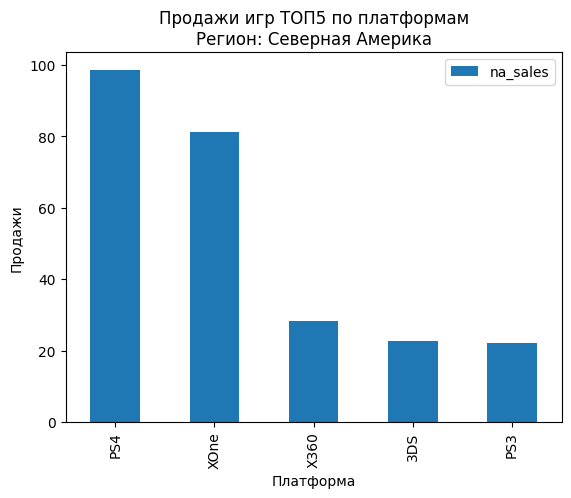

In [56]:
top5_na.plot.bar(y='na_sales', 
                 title='Продажи игр ТОП5 по платформам\nРегион: Северная Америка',
                 xlabel='Платформа', 
                 ylabel='Продажи');

In [57]:
top5_eu['eu_cum_share'] = top5_eu['eu_share'].cumsum()
top5_eu.style.format({'eu_sales':'{:.1f}', 'eu_share':'{:.1%}', 'eu_cum_share':'{:.1%}'})

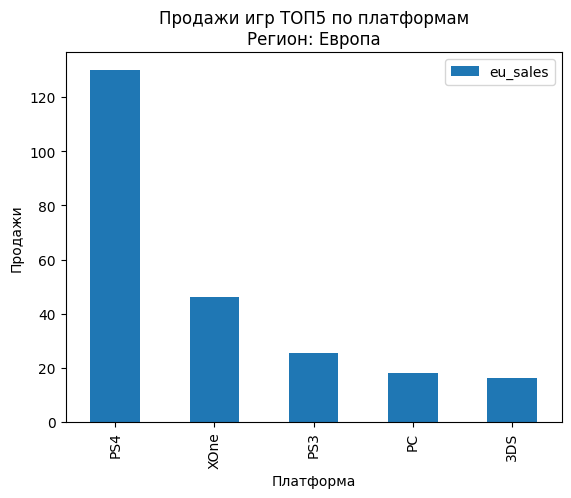

In [58]:
top5_eu.plot.bar(y='eu_sales', 
                 title='Продажи игр ТОП5 по платформам\nРегион: Европа',
                 xlabel='Платформа', 
                 ylabel='Продажи');

In [59]:
top5_jp['jp_cum_share'] = top5_jp['jp_share'].cumsum()
top5_jp.style.format({'jp_sales':'{:.1f}', 'jp_share':'{:.1%}', 'jp_cum_share':'{:.1%}'})

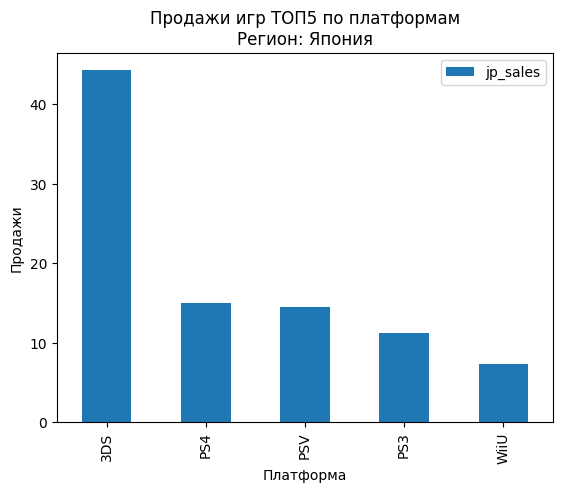

In [60]:
top5_jp.plot.bar(y='jp_sales', 
                 title='Продажи игр ТОП5 по платформам\nРегион: Япония',
                 xlabel='Платформа', 
                 ylabel='Продажи');

Выведем доли по рынкам:

In [61]:
print('na_sales_share=', na_sales_share, '\n','eu_sales_share=', eu_sales_share,'\n','jp_sales_share=', jp_sales_share)

na_sales_share= 38.9 
 eu_sales_share= 37.1 
 jp_sales_share= 12.8


Исследование в разрезе платформ показало, что все три основных рынка имеют свои особенности.

Эти три рынка составляют почти 90% от глобального.

**Северная Америка.**

Доля от глобального рынка - 38.9%

ТОП5:
* PS4 - 34.7%
* XOne - 28.6%
* X360 - 10.0%
* 3DS - 8.0%
* PS3 - 7.8%

ТОП5 по вендорам:
* Sony - 42.5%
* Microsoft - 38.6%
* Nintendo - 8%

Продажи ТОП5 от всех по региону составляют 89%.
<br> Все платформы из ТОП5 - стационарные.

**Европа.**

Доля от глобального рынка - 37.1%

Единственный регион, где PC имеет сколь нибудь значимую долю рынка.

ТОП5:
* PS4 - 48.0%
* XOne - 17.1%
* PS3 - 9.4%
* PC - 6.6%
* 3DS - 6.0%

ТОП5 по вендорам:
* Sony - 57.4%
* Microsoft - 17.1%
* PC - 6.6%
* Nintendo - 6.0%

PC не является вендором, но в контексте нашего исследования некорректно будет убрать эту платформу из списка вендоров. Примем, что это условный вендор.

Продажи ТОП5 от всех по региону составляют 87.2%.
<br>Все платформы из ТОП5 - стационарные.

**Япония.**

Доля от глобального рынка - 12.8%

**Единственный регион, где мобильные платформы представлены в ТОП5 и ТОП5 контролирует приактически весь рынок.**

ТОП5:
* 3DS - 47.5%
* PS4 - 16.1%
* PSV - 15.6%
* PS3 - 12.1%
* WiiU - 7.9%

ТОП5 по вендорам:
* Nintendo - 55.4%
* Sony - 43.8%

Продажи ТОП5 от всех по региону составляют 99.2%.
<br> Платформы из ТОП5 - стационарные и мобильные.
<br> Доля мобильных платформ - 23.5%

Теперь рассмотрим эти рынки в разрезе жанров:

In [62]:
# посчитаем продажи, их распределение и топ5 по жанрам для Северной Америки:
data_na = data_3y.pivot_table(index='genre', values='na_sales', aggfunc='sum')
data_na['na_share'] = data_na['na_sales'] / sum(data_na['na_sales'])
top5_na = data_na.nlargest(5, ['na_share'])

# посчитаем продажи, их распределение и топ5 по жанрам для Европы:
data_eu = data_3y.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
data_eu['eu_share'] = data_eu['eu_sales'] / sum(data_eu['eu_sales'])
top5_eu = data_eu.nlargest(5, ['eu_share'])

# посчитаем продажи, их распределение и топ5 по жанрам для Японии:
data_jp = data_3y.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
data_jp['jp_share'] = data_jp['jp_sales'] / sum(data_jp['jp_sales'])
top5_jp = data_jp.nlargest(5, ['jp_share'])

# посчитаем общие продажи и их распределение по жанрам (референсные значения):
data_total = data_3y.pivot_table(index='genre', values='total_sales', aggfunc='sum')
data_total['total_share'] = data_total['total_sales'] / sum(data_total['total_sales'])

# построим общую таблицу для всех регионов:
region_sales = data_na.join([data_eu, data_jp, data_total])

# рассчитаем доли продаж для регионов:
na_sales_share = round( sum(region_sales['na_sales']) / sum(region_sales['total_sales'] ) * 100, 1 )
eu_sales_share = round( sum(region_sales['eu_sales']) / sum(region_sales['total_sales'] ) * 100, 1 )
jp_sales_share = round( sum(region_sales['jp_sales']) / sum(region_sales['total_sales'] ) * 100, 1 )

# отсортируем по глобальным продажам, отформатируем и выведем на экран результат
h2_format = {'na_sales' : '{:.1f}',
             'na_share' : '{:.1%}',
             'eu_sales' : '{:.1f}',
             'eu_share' : '{:.1%}',
             'jp_sales' : '{:.1f}',
             'jp_share' : '{:.1%}',
             'total_sales' : '{:.0f}',
             'total_share' : '{:.1%}'}
region_sales.sort_values('total_sales', ascending=False).style.format(h2_format)

Итоговая таблица для маркетинга, для нас она слишком перегружена данными.

Выведем топ5 жанров по каждому из регионов:

In [63]:
top5_na['na_cum_share'] = top5_na['na_share'].cumsum()
top5_na.style.format({'na_sales':'{:.1f}', 'na_share':'{:.1%}', 'na_cum_share':'{:.1%}'})

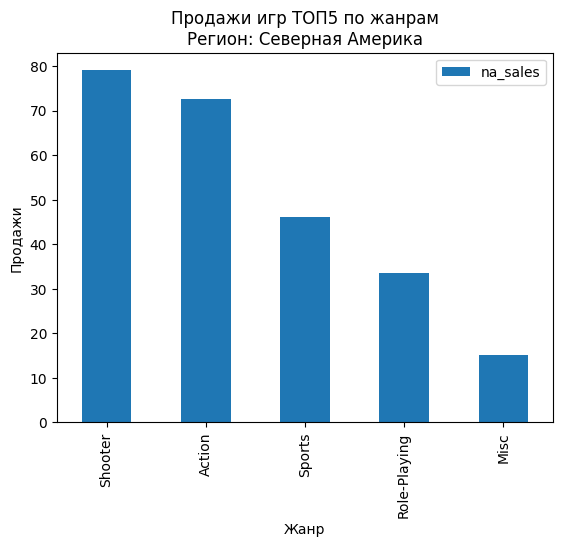

In [64]:
top5_na.plot.bar(y='na_sales', 
                 title='Продажи игр ТОП5 по жанрам\nРегион: Северная Америка',
                 xlabel='Жанр', 
                 ylabel='Продажи');

In [65]:
top5_eu['eu_cum_share'] = top5_eu['eu_share'].cumsum()
top5_eu.style.format({'eu_sales':'{:.1f}', 'eu_share':'{:.1%}', 'eu_cum_share':'{:.1%}'})

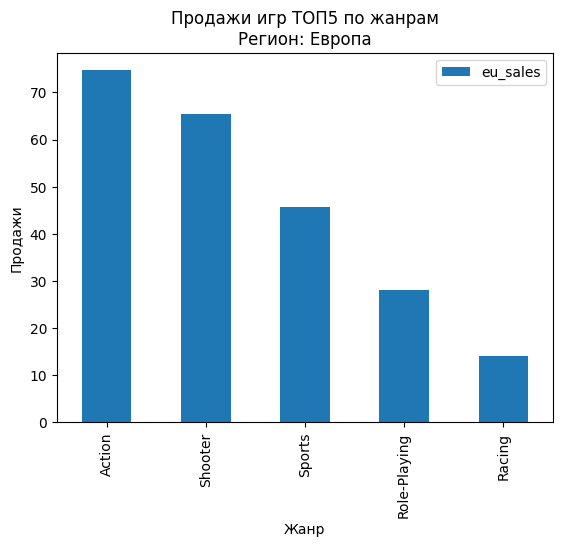

In [66]:
top5_eu.plot.bar(y='eu_sales', 
                 title='Продажи игр ТОП5 по жанрам\nРегион: Европа',
                 xlabel='Жанр', 
                 ylabel='Продажи');

In [67]:
top5_jp['jp_cum_share'] = top5_jp['jp_share'].cumsum()
top5_jp.style.format({'jp_sales':'{:.1f}', 'jp_share':'{:.1%}', 'jp_cum_share':'{:.1%}'})

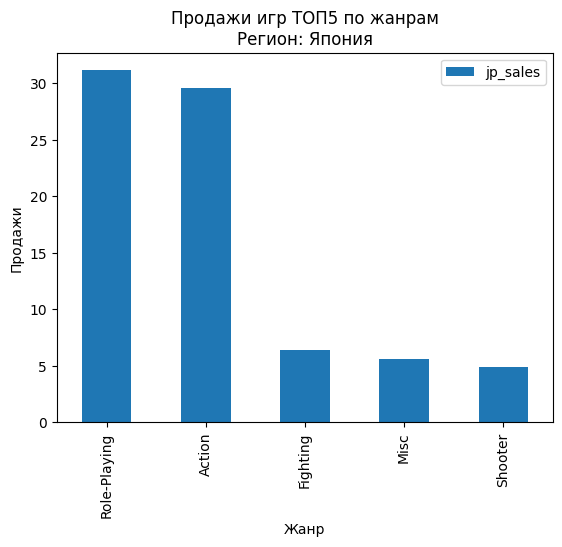

In [68]:
top5_jp.plot.bar(y='jp_sales', 
                 title='Продажи игр ТОП5 по жанрам\nРегион: Япония',
                 xlabel='Жанр', 
                 ylabel='Продажи');

Доля каждого из рынков:

In [69]:
print('na_sales_share=', na_sales_share, '\n','eu_sales_share=', eu_sales_share,'\n','jp_sales_share=', jp_sales_share)

na_sales_share= 38.9 
 eu_sales_share= 37.1 
 jp_sales_share= 12.8


Исследование в разрезе жанров показало, что эти рынки в таком контексте тоже имеют различия.

Эти три рынка составляют почти 90% от глобального.

**Северная Америка.**

Доля от глобального рынка - 38.9%

ТОП5:
* Shooter - 27.8%
* Action - 25.5%
* Sports - 16.2%
* Role-Playing - 11.8%
* Misc - 5.3%

Продажи ТОП5 от всех по региону составляют 86.7%.

**Европа.**

Доля от глобального рынка - 37.1%

ТОП5:
* Action - 27.6%
* Shooter - 24.2%
* Sports - 16.9%
* Role-Playing - 10.4%
* Racing - 5.2%

Продажи ТОП5 от всех по региону составляют 84.3%.

**Япония.**

Доля от глобального рынка - 12.8%

ТОП5:
* Role-Playing - 33.5%
* Action - 31.8%
* Fighting - 6.8%
* Misc - 6.0%
* Shooter - 5.2%

Продажи ТОП5 от всех по региону составляют 83.3%.

Единственный жанр, который входит в ТОП2 на всех рынках - Action.

**Различия.**

ТОП5 Северной Америки и Европы имеют незначительные различия, первые четыре позиции занимают одни и те же жанры, тоько 1 и 2 меняются местами. В обоих рейтингах первые 2 жанра занимают чуть более половины рынка.

ТОП5 Японии кардинально отличается от первых двух, популярные Шутеры в самом конце списка, на 5 месте. Единственное, что их объединяет - жанр Action, один из двух самых популярных жанров в каждом из рейтингов.

**Определим влияние рейтинга ESRB на продажи по регионам:**

[ESRB рейтинги:](https://www.esrb.org/ratings-guide/)
* M - Mature (17+)
* E - Everyone
* T - Teen (13+)
* E10+ - Everyone 10+

In [70]:
# заполним пропуски в рейтинге на 'NA'
data_3y.loc[data_3y['rating'].isna(), 'rating' ] = 'NA'
data_3y[['name','rating']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16442
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1689 non-null   object
 1   rating  1689 non-null   object
dtypes: object(2)
memory usage: 39.6+ KB


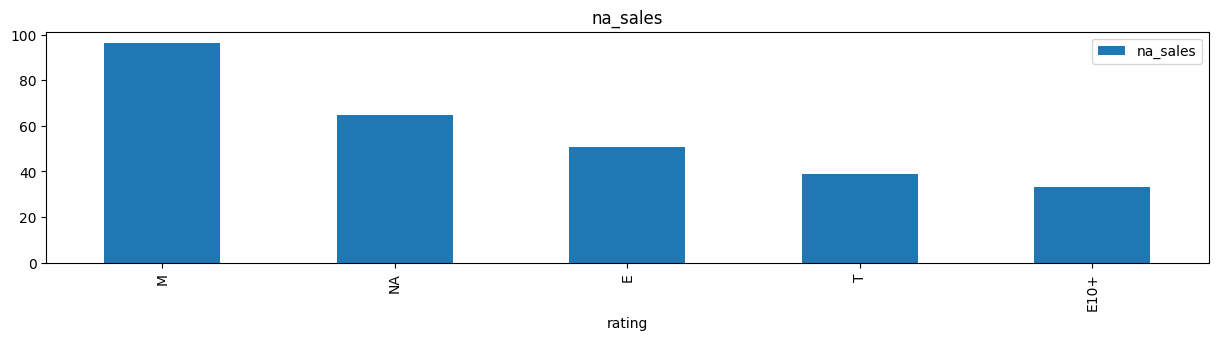

In [71]:
# продажи по рейтингам по Северной Америке
region_sales = 'na_sales'
data_3y.pivot_table(index='rating', values=region_sales, aggfunc='sum') \
    .sort_values(region_sales, ascending=False) \
    .plot(y=region_sales, kind='bar', figsize = (15,3), title=region_sales);

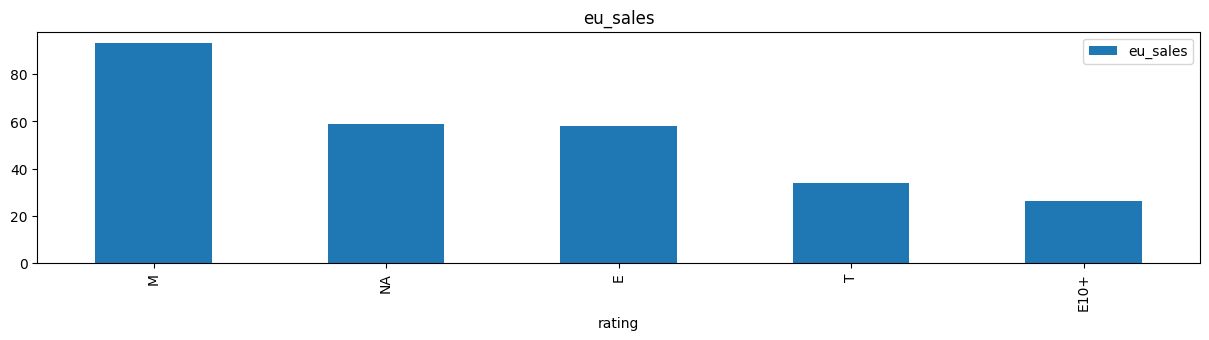

In [72]:
# продажи по рейтингам по Европе
region_sales = 'eu_sales'
data_3y.pivot_table(index='rating', values=region_sales, aggfunc='sum') \
    .sort_values(region_sales, ascending=False) \
    .plot(y=region_sales, kind='bar', figsize = (15,3), title=region_sales);

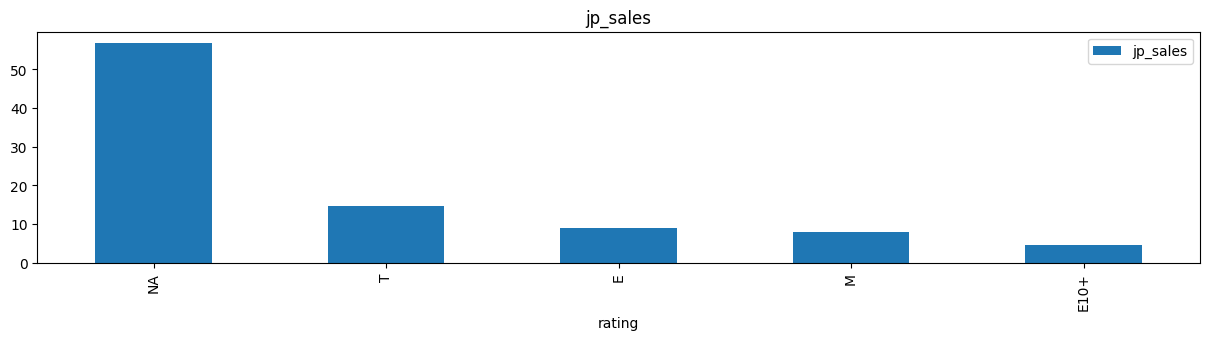

In [73]:
# продажи по рейтингам по Японии
region_sales = 'jp_sales'
data_3y.pivot_table(index='rating', values=region_sales, aggfunc='sum') \
    .sort_values(region_sales, ascending=False) \
    .plot(y=region_sales, kind='bar', figsize = (15,3), title=region_sales);

Несмотря на короткие выборки, результаты согласуются со здравым смыслом. 
<br>Северная Америка и Европа - очень похожи, в топе маркер для взрослых (наиболее кредитоспособная часть населения, сюда же должны попадать шутеры, популярные в этих регионах). 
<br>В Японии распределение другое - максимум приходится на подростков, взрослые заняты на работе, играть некогда. Разные менталитеты.

Отдельно надо отметить, что по сравнению с Северной Америкой и Европой, где рейтинг имеет вес, в Японии значимость рейтинга существенно ниже.

### Вывод: портрет пользователя каждого региона

**Портрет типичного пользователя.**

Северная Америка.
<br>Взрослый человек (17+), имеющий игровую платформу PS4 или XOne, предпочитающий Шутеры или Экшен.

Европа.
<br>Взрослый человек (17+), имеющий игровую платформу PS4, предпочитающий Экшен или Шутеры.

Япония.
<br>Подросток (13+), имеющий игровую платформу 3DS, предпочитающий Role-Playing или Action. С вероятностью более 70% имеет мобильную консоль.

**Платформы.**

Исследование в разрезе платформ показало, что все три основных рынка имеют свои особенности.

Эти три рынка составляют почти 90% от глобального.

**Северная Америка.**

Доля от глобального рынка - 38.9%

ТОП5:
* PS4 - 34.7%
* XOne - 28.6%
* X360 - 10.0%
* 3DS - 8.0%
* PS3 - 7.8%

ТОП5 по вендорам:
* Sony - 42.5%
* Microsoft - 38.6%
* Nintendo - 8%

Продажи ТОП5 от всех по региону составляют 89%.
<br> Доля мобильных платформ -8.0%.

**Европа.**

Доля от глобального рынка - 37.1%

Единственный регион, где PC имеет сколь нибудь значимую долю рынка.

ТОП5:
* PS4 - 48.0%
* XOne - 17.1%
* PS3 - 9.4%
* PC - 6.6%
* 3DS - 6.0%

ТОП5 по вендорам:
* Sony - 57.4%
* Microsoft - 17.1%
* PC - 6.6%
* Nintendo - 6.0%

PC не является вендором, но в контексте нашего исследования некорректно будет убрать эту платформу из списка вендоров. Примем, что это условный вендор.

Продажи ТОП5 от всех по региону составляют 87.2%.
<br> Доля мобильных платформ -6.0%.

**Япония.**

Доля от глобального рынка - 12.8%

Единственный регион, где мобильные платформы представлены в ТОП5 и ТОП5 контролирует приактически весь рынок.

ТОП5:
* 3DS - 47.5%
* PS4 - 16.1%
* PSV - 15.6%
* PS3 - 12.1%
* WiiU - 7.9%

ТОП5 по вендорам:
* Nintendo - 55.4%
* Sony - 43.8%

Продажи ТОП5 от всех по региону составляют 99.2%.
<br> Платформы из ТОП5 - стационарные и мобильные.
<br> Доля мобильных платформ - 71%

**Жанры.**

Три рынка составляют почти 90% от глобального.

**Северная Америка.**

Доля от глобального рынка - 38.9%

ТОП5:
* Shooter - 27.8%
* Action - 25.5%
* Sports - 16.2%
* Role-Playing - 11.8%
* Misc - 5.3%

Продажи ТОП5 от всех по региону составляют 86.7%.

**Европа.**

Доля от глобального рынка - 37.1%

ТОП5:
* Action - 27.6%
* Shooter - 24.2%
* Sports - 16.9%
* Role-Playing - 10.4%
* Racing - 5.2%

Продажи ТОП5 от всех по региону составляют 84.3%.

**Япония.**

Доля от глобального рынка - 12.8%

ТОП5:
* Role-Playing - 33.5%
* Action - 31.8%
* Fighting - 6.8%
* Misc - 6.0%
* Shooter - 5.2%

Продажи ТОП5 от всех по региону составляют 83.3%.

Единственный жанр, который входит в ТОП2 на всех рынках - Action.

**Различия.**

ТОП5 Северной Америки и Европы имеют незначительные различия, первые четыре позиции занимают одни и те же жанры, тоько 1 и 2 меняются местами. В обоих рейтингах первые 2 жанра занимают чуть более половины рынка.

ТОП5 Японии кардинально отличается от первых двух, популярные Шутеры в самом конце списка, на 5 месте. Единственное, что их объединяет - жанр Action, один из двух самых популярных жанров в каждом из рейтингов.

**Влияние рейтинга ESRB на продажи по регионам:**

[ESRB рейтинги:](https://www.esrb.org/ratings-guide/)
* M - Mature (17+)
* E - Everyone
* T - Teen (13+)
* E10+ - Everyone 10+

Отсутствующие рейтинги заполнили значением 'NA' для получения более точной картины.

Несмотря на короткие выборки, результаты согласуются со здравым смыслом. 
<br>Северная Америка и Европа - очень похожи, в топе маркер для взрослых (наиболее кредитоспособная часть населения, сюда же должны попадать шутеры, популярные в этих регионах). 
<br>В Японии распределение другое - максимум приходится на подростков, взрослые заняты на работе, играть некогда. Разные менталитеты.

**Отдельно надо отметить, что по сравнению с Северной Америкой и Европой, где рейтинг имеет вес, в Японии значимость рейтинга существенно ниже.**

## Проверка гипотез

In [74]:
# подготовим данные для проверки гипотез и выведем заголовок на экран, чтобы видеть, где и что находится
data_for_check = data_3y
data_for_check.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   
87       Shooter      2.99      3.49      0.22         1.28           NaN   

    user_score rating  total_sales  
31         NaN     NA        14.63  
42         8.3      M        12.62  
47         NaN     NA        11.68  
77         4.3      E         8.58  
87         NaN     NA         7.98

In [75]:
# удалим пропуски в выборках для корректной работы функции
data_for_check = data_for_check.dropna(subset=['user_score', 'genre', 'platform'])

**Этап 1.**

Проверим достаточность данных для проверки гипотез:

In [76]:
data_for_check[data_for_check['platform'] =='XOne']['user_score'].count()

165

In [77]:
data_for_check[data_for_check['platform'] =='PC']['user_score'].count()

122

**Данных достаточно, переходим к проверке.**

<br>**Сформулируем гипотезы:**
<br>H_0: средний пользовательский рейтинг платформы Xbox One = среднему пользовательскому рейтингу платформы PC
<br>H_a: средний пользовательский рейтинг платформы Xbox One != среднему пользовательскому рейтингу платформы PC

Зададим параметры alpha = 0.01 и equal_var = True - выборки схожие.

In [78]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data_for_check[data_for_check['platform'] =='XOne']['user_score'], \
    data_for_check[data_for_check['platform'] =='PC']['user_score'], \
    equal_var = True)

alpha = 0.01

# вывод значения p-value
print('p-значение:', results.pvalue)

# сравниваем результат проверки со значением alpha и выводим ответ
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**На основании имеющихся данных гипотезу H0 отвергнуть не можем.**

**Этап 2.**

Проверим достаточность данных для проверки гипотез:

In [79]:
data_for_check[data_for_check['genre'] =='Action']['user_score'].count()

297

In [80]:
data_for_check[data_for_check['genre'] =='Sports']['user_score'].count()

127

**Данных достаточно, переходим к проверке.**

<br>**Сформулируем гипотезы:**
<br>H_0: средний пользовательский рейтинг жанра Action = среднему пользовательскому рейтингу жанра Sports
<br>H_a: средний пользовательский рейтинг жанра Action != среднему пользовательскому рейтингу жанра Sports

Зададим параметры alpha = 0.01 и equal_var = True - выборки схожие.

In [81]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data_for_check[data_for_check['genre'] =='Action']['user_score'], \
    data_for_check[data_for_check['genre'] =='Sports']['user_score'], \
    equal_var = True)

alpha = 0.01

# вывод значения p-value
print('p-значение:', results.pvalue)

# сравниваем результат проверки со значением alpha и выводим ответ
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**На основании имеющихся данных нулевую гипотезу отвергаем и принимаем альтернативную.**

### Вывод: проверка гипотез

Сначала подготовим данные - удалим все пропуски из столбцов `'user_score'`, `'genre'`, `'platform'`.



**Этап 1.**

Проверим достаточность данных для проверки гипотез: 165 и 122 значения.
<br>**Данных достаточно, переходим к проверке гипотез.**

<br>**Сформулируем гипотезы:**
<br>H_0: средний пользовательский рейтинг платформы Xbox One = среднему пользовательскому рейтингу платформы PC
<br>H_a: средний пользовательский рейтинг платформы Xbox One != среднему пользовательскому рейтингу платформы PC

Зададим параметры alpha = 0.01 и equal_var = True - выборки схожие.

**Результат проверки:**
<br>На основании имеющихся данных гипотезу H0 отвергнуть не можем.

**Этап 2.**

Проверим достаточность данных для проверки гипотез: 297 и 127 значений.
<br>**Данных достаточно, переходим к проверке.**

<br>**Сформулируем гипотезы:**
<br>H_0: средний пользовательский рейтинг жанра Action = среднему пользовательскому рейтингу жанра Sports
<br>H_a: средний пользовательский рейтинг жанра Action != среднему пользовательскому рейтингу жанра Sports

Зададим параметры alpha = 0.01 и equal_var = True - выборки схожие.

**Результат проверки:**
<br>На основании имеющихся данных нулевую гипотезу отвергаем и принимаем альтернативную:
<br>средний пользовательский рейтинг жанра Action **не равен** среднему пользовательскому рейтингу жанра Sports

# Общий вывод.

**Цель проекта достигнута:**
<br>Рекомендуются использовать диверсифицированный подход для каждого из трех важнейших рынков.

Рекомендуется, чтобы продукт соответствовал следующим критериям:

<table>
  <tr>
    <th>Регион</th>
    <th>Платформа</th>
    <th>Жанр</th>
    <th>ESRB рейтинг</th>
    <th>Рейтинг критиков</th>
    <th>Оценка пользователей</th>
  </tr>
  <tr>
    <td>Северная Америка</td>
    <td>PS4, XOne</td>
    <td>Shooter, Action, Sports</td>
    <td>M</td>
    <td>не меньше 70</td>
    <td>4 - 6</td>
  </tr>
  <tr>
    <td>Европа</td>
    <td>PS4</td>
    <td>Action, Shooter, Sports</td>
    <td>M</td>
    <td>не меньше 70</td>
    <td>4 - 6</td>
  </tr>
  <tr>
    <td>Япония</td>
    <td>3DS</td>
    <td>Role-Playing, Action</td>
    <td>---</td>
    <td>не меньше 70</td>
    <td>7 - 9</td>
  </tr>
</table>

---

**Общая информация.**

Изучив общую информацию о датасете можем сказать, что в нем содержится 11 столбцов данных, все названия столбцов имеют в своем составе прописные буквы, три метрики - Ретинги критиков, ESRB и Пользовательский -  имеют значительные пропуски.

Первые два восстановить невозможно (в обоих случаях неизвестен алгоритм присвоения рейтинга). Что касается третьего, пользовательского рейтинга, решение примем позднее на основании корреляции с первым.

Год релиза: важный для нас показатель, по нему будеть происходить значимая часть анализа. Отсутствуют 1.6% данных - незначительная часть, удалили.

По 2 пропуска в Названии игры и Жанре тоже можно удалить.

Столбцы Пользовательский рейтинг и Год выхода имеют неподходящий для исследования формат, необходимо преобразование.

---

**Подготовка данных**

В процессе подготовки данных было проделано:
* преобразование названий столбцов в строчные буквы с символом "_";
* удалены строки с пропусками данных в столбцах * `'year_of_release'`, `'name'` и `'genre'`;
* тип данных столбца `'year_of_release'` преобразован в `int`;
* в столбце `'rating'` заменены устаревшие маркировки: EC и K-A на E, AO на M, RP на nan (значит, что рейтинг пока не присвоен);
* в столбце `'user_score'` заменили отсутствующие данные, обозначенные как tbd, на nan и преобразовали в формат `float64`;
* добавлены продажи по всем регионам в отдельный столбец `'total_sales'`;
* проведен поиск явных дубликатов, явных дубликатов не обнаружено;
* добавлен столбец `'lower_name'` для поиска неявных дубликатов;
* проведен поиск неявных дубликатов по столбцам `'lower_name'` и `'platform'`, выявлено 3. Два из которых оказались релизом и ремейком (то есть не дубликатами). По 1 произведено сложение количественных показателей, дубликат удален;
* после удаления неявных дубликатов столбец `'lower_name'` удален;
* для столбцов `'critic_score'` и `'user_score'` построена диаграмма рассеивания и посчитан коэффициент корреляции - значимая корреляция не прослеживается (К=0.58);

Сделан вывод, что заполнение столбца `'user_score'` синтетическими данными необосновано.

**Причины отсутствия данных.**

Практически все отсутствующие данные сосоредоточены в 3х столбцах - в рейтингах. Отсутствие данных можно объяснить тем, что не все выпускаемые игры привлекают внимание критиков и ESRB, не по всем набирается достаточное количество отзывов игроков.

Объем оставшихся данных после предобработки - 98.37%, что является хорошим показателем.

После всех преобразований проведен сброс индексов, чтобы восстановить целостность таблицы.

---

**Исследовательский анализ**

**Количество игр.**

Пик по количеству выпущенных игр пришелся на 2008 -2009 годы. Начиная с 1993 и до этого периода наблюдается общий тренд на рост. После этого резкое падение до 2013 года, затем стабилизация рынка со значительно меньшей волатильностью.

**Актуальный период.**
<br>На основании проведенного анализа можно установить актуальный период с 2014 по 2016 годы.

**Продажи по платформам.**
<br>11 наиболее доходных платформ по годам (они дали практически 80% продаж):
* PS2
* X360
* PS3
* Wii
* DS
* PS
* PS4
* GBA
* PSP
* 3DS
* GB

Можно утверждать, что практически все платформы основную часть выручки приносят за период в 6 лет.

Наиболее денежные платформы за последние 3 года (3 года - полупериод основной активности платформы, достаточно, чтобы увидеть тренд):
* PS4
* XOne
* 3DS
* PS3
* X360
* WiiU
* PC
* PSV
* Wii
* PSP


**Актуальные платформы:**
<br>Одна из 10 актуальных за последние 3 года платформ - PSP - не дожила до 2016 года. 

Только 2 первые платформы, PS4 и XOne, показывают на периоде в 3 года разнонаправленный тренд с пиком в 2015 году, что позволяет говорить о том, что они могут быть актуальны еще 2 года.

Из текущих платформ для маркетинга представляют интерес первые семь, до PC включительно:
* PS4
* XOne
* 3DS
* PS3
* X360
* WiiU
* PC

**Диаграмма размаха**
<br>По глобальным продажам игр в разбивке по платформам за последние 3 года:
<br>Хорошо видно, что при достаточно больших выбросах вправо, медианные значения находятся в достаточно узком диапазоне.

То же только для 2016 года:
<br>Для двух самых перспективных из имеющихся на настоящее время - PS4 и XOne - медианы практически не отличаются. И оба значения лишь незначительно отличаются от медианных за весь период в 3 года. Разброс тоже практически совпадает.

Выбросы по платформам различаются. Чем больше выбросов, тем менее однородная аудитория платформы. самые неоднородные платформы - PSV, PC, 3DS. WiiU примерно посредине. За исключением PC, остальные 3 - это мобильные платформы. То есть можно сказать, что аудитория стационарных платформ более однородная. Платформа PC по структуре своей аудитории совпадает с мобильными платформами и не похожа на стационарные.

**Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.**

Корреляция между отзывами критиков и продажами:
<br>На основании визуализации данных можно сделать вывод, что низкий рейтинг гарантирует крайне незначительные продажи. Это не означает, что высокий рейтинг обеспечит продажи, но рассматривать продукт с Рейтингом критиков ниже 60 не имеет смысла, это гарантированный провал. Для рейтинга от 60 до 70 должны быть очень веские обоснования. Рекомендуемый рейтинг - не ниже 70.

Корреляция между отзывами пользователей и продажами:
<br>Низкие отзывы пользователей гарантируют плохие продажи, но и высокий балл по отзывам также не гарантирует высоких продаж. Для всех платформ хорошие продажи находятся в интервале. У каждой оптимальный диапазон свой платформы он свой:
* PS4: 4-9 балла
* XOne: 4-8 балла
* 3DS: 7-9 балла
* PS3: 3-5 балла
* X360: 3-6 балла
* WiiU: 8.5-9 баллов
* PC: 4-6 балла
* PSV: 7-9 балла
* Wii: нет данных
* PS: нет данных

Если брать усредненный диапазон, то для большинства платформ это 4-6 баллов, исключение составляют 2 мобильные платформы, 3DS: 7-9 балла и WiiU: 8.5-9 баллов.

**Причина пропусков данных**
<br>С ростом количества выпускаемых игр, с большой вероятностью не все игры получают достаточное количество оченок для составления рейтинга.
<br>При этом детальное исследование данного вопроса невозможно на основании анализируемого датасета и выходит за рамки текущего исследования.

**Количество и продажи игр по жанрам.**

Продажи по жанрам:
<br>Самые популярные - Action, Shooter, Sports.

Количество игр по жанрам:
<br>Выручка не коррелирует с количеством игр. 
<br>В топе Action, Role-Playing, Adventure.

Удельная выручка по жанрам (позволяет корректно таргетировать маркетинговые расходы):
<br>Лидер  - Шутеры. Побеждают с большим отрывом. Затем идут Sports	и Platform.

---

**Портрет пользователя каждого региона**

**Портрет типичного пользователя.**

Северная Америка.
<br>Взрослый человек (17+), имеющий игровую платформу PS4 или XOne, предпочитающий Шутеры или Экшен.

Европа.
<br>Взрослый человек (17+), имеющий игровую платформу PS4, предпочитающий Экшен или Шутеры.

Япония.
<br>Подросток (13+), имеющий игровую платформу 3DS, предпочитающий Role-Playing или Action. С вероятностью более 70% имеет мобильную консоль.

**Платформы.**

Исследование в разрезе платформ показало, что все три основных рынка имеют свои особенности.

Эти три рынка составляют почти 90% от глобального.

**Северная Америка.**

Доля от глобального рынка - 38.9%

ТОП5:
* PS4 - 34.7%
* XOne - 28.6%
* X360 - 10.0%
* 3DS - 8.0%
* PS3 - 7.8%

ТОП5 по вендорам:
* Sony - 42.5%
* Microsoft - 38.6%
* Nintendo - 8%

Продажи ТОП5 от всех по региону составляют 89%.
<br> Доля мобильных платформ -8.0%.

**Европа.**

Доля от глобального рынка - 37.1%

Единственный регион, где PC имеет сколь нибудь значимую долю рынка.

ТОП5:
* PS4 - 48.0%
* XOne - 17.1%
* PS3 - 9.4%
* PC - 6.6%
* 3DS - 6.0%

ТОП5 по вендорам:
* Sony - 57.4%
* Microsoft - 17.1%
* PC - 6.6%
* Nintendo - 6.0%

PC не является вендором, но в контексте нашего исследования некорректно будет убрать эту платформу из списка вендоров. Принимаем, что это условный вендор.

Продажи ТОП5 от всех по региону составляют 87.2%.
<br> Доля мобильных платформ -6.0%.

**Япония.**

Доля от глобального рынка - 12.8%

Единственный регион, где мобильные платформы представлены в ТОП5 и ТОП5 контролирует приактически весь рынок.

ТОП5:
* 3DS - 47.5%
* PS4 - 16.1%
* PSV - 15.6%
* PS3 - 12.1%
* WiiU - 7.9%

ТОП5 по вендорам:
* Nintendo - 55.4%
* Sony - 43.8%

Продажи ТОП5 от всех по региону составляют 99.2%.
<br> Платформы из ТОП5 - стационарные и мобильные.
<br> Доля мобильных платформ -71.0%.

**Жанры.**

Три рынка составляют почти 90% от глобального.

**Северная Америка.**

Доля от глобального рынка - 38.9%

ТОП5:
* Shooter - 27.8%
* Action - 25.5%
* Sports - 16.2%
* Role-Playing - 11.8%
* Misc - 5.3%

Продажи ТОП5 от всех по региону составляют 86.7%.

**Европа.**

Доля от глобального рынка - 37.1%

ТОП5:
* Action - 27.6%
* Shooter - 24.2%
* Sports - 16.9%
* Role-Playing - 10.4%
* Racing - 5.2%

Продажи ТОП5 от всех по региону составляют 84.3%.

**Япония.**

Доля от глобального рынка - 12.8%

ТОП5:
* Role-Playing - 33.5%
* Action - 31.8%
* Fighting - 6.8%
* Misc - 6.0%
* Shooter - 5.2%

Продажи ТОП5 от всех по региону составляют 83.3%.

Единственный жанр, который входит в ТОП2 на всех рынках - Action.

**Различия.**

ТОП5 Северной Америки и Европы имеют незначительные различия, первые четыре позиции занимают одни и те же жанры, тоько 1 и 2 меняются местами. В обоих рейтингах первые 2 жанра занимают чуть более половины рынка.

ТОП5 Японии кардинально отличается от первых двух, популярные Шутеры в самом конце списка, на 5 месте. Единственное, что их объединяет - жанр Action, один из двух самых популярных жанров в каждом из рейтингов.

**Влияние рейтинга ESRB на продажи по регионам:**

[ESRB рейтинги:](https://www.esrb.org/ratings-guide/)
* M - Mature (17+)
* E - Everyone
* T - Teen (13+)
* E10+ - Everyone 10+

Распределение на основании рейтинга ESRB:
<br>Северная Америка и Европа - очень похожи, в топе маркер для взрослых (наиболее кредитоспособная часть населения, сюда же должны попадать шутеры, популярные в этих регионах). 
<br>В Японии распределение другое - максимум приходится на подростков, взрослые заняты на работе, играть некогда. Разные менталитеты.

**Отдельно надо отметить, что по сравнению с Северной Америкой и Европой, где рейтинг имеет вес, в Японии значимость рейтинга существенно ниже.**

---

**Проверка гипотез**

Подготовили данные - удалили все пропуски из столбцов `'user_score'`, `'genre'`, `'platform'`.

**Этап 1.**

Проверили достаточность данных для проверки гипотез: 165 и 122 значения.
<br>**Данных достаточно, переходим к проверке гипотез.**

<br>**Сформулируем гипотезы:**
<br>H_0: средний пользовательский рейтинг платформы Xbox One = среднему пользовательскому рейтингу платформы PC
<br>H_a: средний пользовательский рейтинг платформы Xbox One != среднему пользовательскому рейтингу платформы PC

Задали параметры alpha = 0.01 и equal_var = True - выборки схожие.

**Результат проверки:**
<br>На основании имеющихся данных **гипотезу H0 отвергнуть не можем**.

**Этап 2.**

Проверили достаточность данных для проверки гипотез: 297 и 127 значений.
<br>**Данных достаточно, переходим к проверке гипотез.**

<br>**Сформулируем гипотезы:**
<br>H_0: средний пользовательский рейтинг жанра Action = среднему пользовательскому рейтингу жанра Sports
<br>H_a: средний пользовательский рейтинг жанра Action != среднему пользовательскому рейтингу жанра Sports

Задали параметры alpha = 0.01 и equal_var = True - выборки схожие.

**Результат проверки:**
<br>На основании имеющихся данных **нулевую гипотезу отвергаем** и принимаем альтернативную:
<br>средний пользовательский рейтинг жанра Action **не равен** среднему пользовательскому рейтингу жанра Sports.